In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns
from matplotlib import patheffects
from scipy.stats._survival import EmpiricalDistributionFunction
from calendar import month_name
import spei as si  # si for standardized index

print(si.show_versions())

python: 3.13.5
spei: 0.8.2
numpy: 2.1.3
scipy: 1.15.3
matplotlib: 3.10.0
pandas: 2.2.3


In [2]:
# Read metadata
metadata = pd.read_excel('data/metadata_10%_79pos_2010-01-01.xlsx') 
metadata = metadata.set_index(['Pos Hujan ID'])
metadata

Nama Stasiun      Balai       Provinsi         Kabupaten  \
Pos Hujan ID                                                             
34010101a        BPP Temon  Region II  DI Yogyakarta  Kab. Kulon Progo   
34010201a             Beji  Region II  DI Yogyakarta  Kab. Kulon Progo   
34010202a      BPP Kulwaru  Region II  DI Yogyakarta  Kab. Kulon Progo   
34010301a     BPP Panjatan  Region II  DI Yogyakarta  Kab. Kulon Progo   
34010401a      PSDA Brosot  Region II  DI Yogyakarta  Kab. Kulon Progo   
...                    ...        ...            ...               ...   
34041504a      Tunggularum  Region II  DI Yogyakarta       Kab. Sleman   
34041601a            Pakem  Region II  DI Yogyakarta       Kab. Sleman   
34041701a        Bronggang  Region II  DI Yogyakarta       Kab. Sleman   
34041702a            Cepit  Region II  DI Yogyakarta       Kab. Sleman   
34041704a          Gondang  Region II  DI Yogyakarta       Kab. Sleman   

              Lintang      Bujur  Elevasi  ZOM  
Pos Hujan ID                                    
34010101a    -7.89000  110.08000        0  273  
34010201a    -7.87300  110.16200        0  273  
34010202a    -7.89000  110.11700        0  273  
34010301a    -7.92308  110.15800        0  273  
34010401a    -7.95000  110.22400        0  273  
...               ...        ...      ...  ...  
34041504a    -7.59981  110.39375      748  269  
34041601a    -7.67308  110.42014        0  269  
34041701a    -7.66086  110.44419        0  269  
34041702a    -7.65642  110.46722      524  269  
34041704a    -7.62308  110.43375      765  269  

[79 rows x 8 columns]

In [3]:
# Read daily precipitation data
data_daily = pd.read_excel('data/dailyprecip_10%_79pos_2010-01-01_imputed.xlsx') 
data_daily = data_daily.set_index(['DATA TIMESTAMP'])
data_daily

34010101a  34010201a  34010202a  34010301a  34010401a  \
DATA TIMESTAMP                                                          
2010-01-01            0.0        0.0        0.0        0.0        0.0   
2010-01-02            0.0        0.0        0.0        0.0        0.0   
2010-01-03            0.0        0.0        0.0        0.0        0.0   
2010-01-04           11.0       13.0        0.0        0.0        0.0   
2010-01-05            8.0        0.0       12.0       11.0       30.0   
...                   ...        ...        ...        ...        ...   
2024-12-27           35.0       17.6       29.0       31.5       23.0   
2024-12-28            0.0        0.0        0.0        0.0        1.0   
2024-12-29           11.0        9.0        6.5        6.0        3.0   
2024-12-30           17.0       14.7       20.5       19.5       10.0   
2024-12-31            3.0        5.6        7.5        6.0        0.0   

                34010402a  34010501a  34010601a  34010701a  34010801a  ...  \
DATA TIMESTAMP                                                         ...   
2010-01-01            0.0        0.0        0.0        0.0        0.0  ...   
2010-01-02            0.0        0.0        0.0        0.0        0.0  ...   
2010-01-03            0.0        0.0        0.0        0.0        0.0  ...   
2010-01-04            0.0        0.0        0.0        0.0        7.0  ...   
2010-01-05           30.0       30.0        0.0        0.0        2.0  ...   
...                   ...        ...        ...        ...        ...  ...   
2024-12-27           21.5       23.0       13.0       11.1       18.0  ...   
2024-12-28            0.0        5.0        0.0        0.0        0.0  ...   
2024-12-29            6.0        4.0       13.0        3.2        4.0  ...   
2024-12-30           14.0       15.0       12.0       24.8        1.5  ...   
2024-12-31            2.5        7.0        3.0        0.9        0.0  ...   

                34041303a  34041401a  34041501a  34041502a  34041504a  \
DATA TIMESTAMP                                                          
2010-01-01            0.0        0.0       58.0       57.0       49.1   
2010-01-02            0.0        0.0       55.0       53.0       43.7   
2010-01-03            0.0        0.0       20.0       17.0       16.9   
2010-01-04            7.0       13.0        0.0        0.0        0.3   
2010-01-05            0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
2024-12-27           24.0       21.5        9.0       11.5        9.0   
2024-12-28            0.0        0.0        0.0        0.0        2.4   
2024-12-29            5.0       10.0       11.0       11.0       13.0   
2024-12-30            3.0        3.5        4.5        2.5        3.2   
2024-12-31            3.0       12.0       20.0       26.0       21.0   

                34041601a  34041701a  34041702a  34041704a  34021301a  
DATA TIMESTAMP                                                         
2010-01-01           25.0       22.0       24.8       36.6        0.0  
2010-01-02            2.0        2.0        6.4       24.2        0.0  
2010-01-03            0.0        1.0        3.2       10.2        0.0  
2010-01-04            0.0        0.0        0.0        0.2        0.0  
2010-01-05            0.0        0.0        0.0        0.0        0.0  
...                   ...        ...        ...        ...        ...  
2024-12-27           10.5       10.0        4.5        5.5       16.0  
2024-12-28            0.0        0.0        0.0        0.0        0.0  
2024-12-29           10.5       11.0        8.0       18.0        4.0  
2024-12-30            5.0        6.0        0.5        2.0       11.5  
2024-12-31           45.5       33.5       18.5       21.0        1.0  

[5479 rows x 79 columns]

In [4]:
# Dictionary to store loaded rainfed-field SPI datasets
spi_dict = {}

# List of SPI time scales to load
scales = [10, 15, 20, 30, 60, 90]

# Aggregation method used during preprocessing
method = "p20"

for scale in scales:
    fname = f"data/dspi/result/SPI_{scale}_rainfed_{method}_rounded.xlsx"

    try:
        # Load SPI table for this scale
        df = pd.read_excel(fname)

        # Ensure the 'date' column becomes the index
        if "date" in df.columns:
            df = df.set_index("date")

        # Ensure index is datetime
        df.index = pd.to_datetime(df.index)

        # Save the DataFrame inside the dictionary
        spi_dict[scale] = df

        print(f"Loaded {fname} with {len(df)} records")

    except FileNotFoundError:
        print(f"File not found: {fname}")


Loaded data/dspi/result/SPI_10_rainfed_p20_rounded.xlsx with 2557 records
Loaded data/dspi/result/SPI_15_rainfed_p20_rounded.xlsx with 2557 records
Loaded data/dspi/result/SPI_20_rainfed_p20_rounded.xlsx with 2557 records
Loaded data/dspi/result/SPI_30_rainfed_p20_rounded.xlsx with 2557 records
Loaded data/dspi/result/SPI_60_rainfed_p20_rounded.xlsx with 2557 records
Loaded data/dspi/result/SPI_90_rainfed_p20_rounded.xlsx with 2557 records


In [42]:
# Read drought samples
drought_samples = pd.read_excel("dataset_kekeringan.xlsx")
drought_samples.head()

id kecamatan         kabupaten period_start period_end  luas_kumulatif  \
0   81    Bantul       Kab. Bantul   2023-10-16 2023-10-31            12.0   
1   48    Dlingo       Kab. Bantul   2019-06-01 2019-06-30            85.0   
2   80    Dlingo       Kab. Bantul   2023-09-16 2023-09-30            34.0   
3  109    Dlingo       Kab. Bantul   2024-07-10 2024-08-15            60.0   
4   56     Galur  Kab. Kulon Progo   2019-07-01 2019-07-31             0.5   

       musim_tanam    zom  
0    Oktober-Maret  274.0  
1  April-September  271.0  
2  April-September  271.0  
3  April-September  271.0  
4  April-September    NaN

In [6]:
# Drought identification using Daily SPI (DSPI)
from datetime import timedelta

# MAIN PARAMETERS
threshold = -0.5                           # SPI drought threshold (SPI ≤ -0.5)
scales = [10, 15, 20, 30, 60, 90]          # SPI time scales to evaluate

# Load actual drought event records
drought_samples = pd.read_excel("dataset_kekeringan.xlsx")
for col in ['period_start', 'period_end']:
    drought_samples[col] = pd.to_datetime(drought_samples[col], errors='coerce')

# Explicit filtering for rainfed-only subdistricts
rainfed_kecamatan = set([c.lower().strip() for df in spi_dict.values() for c in df.columns])
drought_samples['kecamatan_norm'] = drought_samples['kecamatan'].str.lower().str.strip()

before = len(drought_samples)
drought_samples = drought_samples[drought_samples['kecamatan_norm'].isin(rainfed_kecamatan)]
after = len(drought_samples)

print(f"\nFiltered drought events: {after}/{before} remain (rainfed subdistricts only)\n")

# Helper functions
def normalize_name(s):
    """Lowercase and strip whitespace for consistent matching."""
    if pd.isna(s):
        return s
    return str(s).strip().lower()

def expand_contiguous(series_full, d0, threshold):
    """
    Expand a drought segment both backward and forward from a starting date (d0)
    as long as SPI ≤ threshold.
    """
    if d0 not in series_full.index:
        # align to nearest available date
        idx_after = series_full.index[series_full.index >= d0]
        if len(idx_after) > 0:
            d0 = idx_after[0]
        else:
            idx_before = series_full.index[series_full.index <= d0]
            if len(idx_before) > 0:
                d0 = idx_before[-1]
            else:
                return (pd.NaT, pd.NaT)

    # Expand backward
    onset = d0
    cur = d0
    while True:
        prev_day = cur - timedelta(days=1)
        if prev_day in series_full.index and series_full.loc[prev_day] <= threshold:
            onset = prev_day
            cur = prev_day
        else:
            break

    # Expand forward
    end = d0
    cur = d0
    while True:
        next_day = cur + timedelta(days=1)
        if next_day in series_full.index and series_full.loc[next_day] <= threshold:
            end = next_day
            cur = next_day
        else:
            break

    return (onset, end)

def is_in_MT1(date):
    """True if date is within April–September planting season."""
    if pd.isna(date): 
        return False
    doy = date.timetuple().tm_yday
    return 91 <= doy <= 273

def is_in_MT2(date):
    """True if date is within October–March planting season."""
    if pd.isna(date): 
        return False
    doy = date.timetuple().tm_yday
    return doy >= 274 or doy <= 90

# Planting seasons to evaluate
season_filters = {
    "AllSeason": lambda d: True,
    "AprSep": is_in_MT1,
    "OctMar": is_in_MT2
}

all_results = []

# Loop over all planting seasons
for season_name, mask_func in season_filters.items():
    print(f"\nProcessing planting season: {season_name}")

    # Filter by planting season
    mask = drought_samples['period_start'].apply(mask_func)
    drought_sub = drought_samples.loc[mask].reset_index(drop=True)
    print(f"{len(drought_sub)} drought events fall within season {season_name}")

    unique_kec = {normalize_name(k): k for k in drought_sub['kecamatan'].unique()}
    records = []

    # --- Loop across SPI time scales ---
    for scale, spi_df in spi_dict.items():
        print(f"\nProcessing SPI scale = {scale} days")
        spi_df = spi_df.copy()
        spi_df.index = pd.to_datetime(spi_df.index)
        col_map = {normalize_name(c): c for c in spi_df.columns}

        # Evaluate each actual drought event
        for idx, row in drought_sub.iterrows():
            kec_raw = row['kecamatan']
            kec_norm = normalize_name(kec_raw)

            if kec_norm not in col_map:
                continue  # safety check; generally will not occur after filtering

            col_name = col_map[kec_norm]

            start_actual = pd.to_datetime(row['period_start'])
            end_actual = pd.to_datetime(row['period_end'])

            # Extract ±365-day SPI window surrounding the actual drought period
            window_start = start_actual - pd.Timedelta(days=365)
            window_end = end_actual + pd.Timedelta(days=365)
            series_full = spi_df[col_name].loc[window_start:window_end].sort_index()

            if series_full.empty:
                continue

            series_actual = series_full.loc[start_actual:end_actual]
            onset_spi = pd.NaT
            end_spi = pd.NaT
            note = ""
            n_segments = np.nan

            # Case (a): SPI drought begins exactly on period_start
            if len(series_actual) > 0 and (start_actual in series_actual.index) and (series_actual.loc[start_actual] <= threshold):
                onset_spi, end_spi = expand_contiguous(series_full, start_actual, threshold)
                note = "case_a"

            # Case (b): SPI drought exists inside the actual time window
            elif (series_actual.size > 0) and (series_actual <= threshold).any():
                below_mask = (series_actual <= threshold)

                # Identify contiguous segments
                change_points = below_mask.ne(below_mask.shift()).cumsum()
                n_segments = below_mask.groupby(change_points).apply(lambda x: (x == True).any()).sum()

                if n_segments > 1:
                    # Multiple disjoint segments → union approach
                    onset_spi = series_actual[below_mask].index.min()
                    end_spi = series_actual[below_mask].index.max()
                    note = "case_b_union_of_segments"
                else:
                    # Single SPI drought segment → Zhang et al. original approach
                    first_d = series_actual[below_mask].index[0]
                    onset_spi, end_spi = expand_contiguous(series_full, first_d, threshold)
                    note = "case_b_single_segment"

            # Case (c): No SPI drought during the actual period
            else:
                onset_spi = pd.NaT
                end_spi = pd.NaT
                note = "case_c_drought_free_in_actual_period"

            # Compute drought duration
            if pd.notnull(onset_spi) and pd.notnull(end_spi):
                duration = (pd.to_datetime(end_spi) - pd.to_datetime(onset_spi)).days + 1
                identified = True
            else:
                duration = np.nan
                identified = False

            # Store record
            records.append({
                'id': row['id'],
                'kecamatan': kec_raw,
                'kabupaten': row.get('kabupaten', np.nan),
                'period_start': start_actual,
                'period_end': end_actual,
                'scale': scale,
                'onset_spi': onset_spi,
                'end_spi': end_spi,
                'duration_days': duration,
                'is_drought_identified': identified,
                'note': note,
                'n_segments': int(n_segments) if not pd.isna(n_segments) else np.nan
            })

    # Save results for this planting season
    spi_identified_df = pd.DataFrame(records)
    for c in ['onset_spi', 'end_spi', 'period_start', 'period_end']:
        spi_identified_df[c] = pd.to_datetime(spi_identified_df[c], errors='coerce')

    out_fname = f"data/dspi/identifikasi_kekeringan_SPI_rainfed_{method}_{season_name}.xlsx"
    spi_identified_df.to_excel(out_fname, index=False)
    print(f"\nSaved SPI drought identification output ({season_name}) to: {out_fname}")

    # Accuracy and sensitivity evaluation
    def compute_flags(row):
        if pd.isna(row['onset_spi']):
            return pd.Series({'is_identified': False, 'is_early': False})
        identified = row['onset_spi'] <= row['period_end']
        early = identified and (row['onset_spi'] < row['period_start'])
        return pd.Series({'is_identified': identified, 'is_early': early})

    spi_identified_df[['is_identified', 'is_early']] = spi_identified_df.apply(compute_flags, axis=1)

    summary = (
        spi_identified_df.groupby('scale')
        .agg(
            total=('id', 'count'),
            identified=('is_identified', 'sum'),
            early_identified=('is_early', 'sum')
        )
        .assign(
            accuracy=lambda x: (x['identified'] / x['total'] * 100).round(2),
            sensitivity=lambda x: np.where(
                x['identified'] > 0,
                (x['early_identified'] / x['identified'] * 100).round(2),
                np.nan
            )
        )
        .reset_index()
    )
    summary['season'] = season_name
    all_results.append(summary)

# Combine planting season results
final_summary = pd.concat(all_results, ignore_index=True)
final_summary_out = f"data/dspi/akurasi_sensitivitas_SPI_rainfed_{method}_allseason.xlsx"
final_summary.to_excel(final_summary_out, index=False)

print("\nFinal accuracy and sensitivity results saved to:")
print(f"   {final_summary_out}\n")

print("Summary:")
display(final_summary)



Filtered drought events: 86/110 remain (rainfed subdistricts only)


Processing planting season: AllSeason
86 drought events fall within season AllSeason

Processing SPI scale = 10 days

Processing SPI scale = 15 days

Processing SPI scale = 20 days

Processing SPI scale = 30 days

Processing SPI scale = 60 days

Processing SPI scale = 90 days

Saved SPI drought identification output (AllSeason) to: data/dspi/identifikasi_kekeringan_SPI_rainfed_p20_AllSeason.xlsx

Processing planting season: AprSep
60 drought events fall within season AprSep

Processing SPI scale = 10 days

Processing SPI scale = 15 days

Processing SPI scale = 20 days

Processing SPI scale = 30 days

Processing SPI scale = 60 days

Processing SPI scale = 90 days

Saved SPI drought identification output (AprSep) to: data/dspi/identifikasi_kekeringan_SPI_rainfed_p20_AprSep.xlsx

Processing planting season: OctMar
26 drought events fall within season OctMar

Processing SPI scale = 10 days

Processing SPI scale = 15 days

scale  total  identified  early_identified  accuracy  sensitivity  \
0      10     86          82                66     95.35        80.49   
1      15     86          80                56     93.02        70.00   
2      20     86          78                58     90.70        74.36   
3      30     86          80                66     93.02        82.50   
4      60     86          83                60     96.51        72.29   
5      90     86          79                47     91.86        59.49   
6      10     60          56                41     93.33        73.21   
7      15     60          54                35     90.00        64.81   
8      20     60          52                36     86.67        69.23   
9      30     60          55                41     91.67        74.55   
10     60     60          58                36     96.67        62.07   
11     90     60          54                23     90.00        42.59   
12     10     26          26                25    100.00        96.15   
13     15     26          26                21    100.00        80.77   
14     20     26          26                22    100.00        84.62   
15     30     26          25                25     96.15       100.00   
16     60     26          25                24     96.15        96.00   
17     90     26          25                24     96.15        96.00   

       season  
0   AllSeason  
1   AllSeason  
2   AllSeason  
3   AllSeason  
4   AllSeason  
5   AllSeason  
6      AprSep  
7      AprSep  
8      AprSep  
9      AprSep  
10     AprSep  
11     AprSep  
12     OctMar  
13     OctMar  
14     OctMar  
15     OctMar  
16     OctMar  
17     OctMar

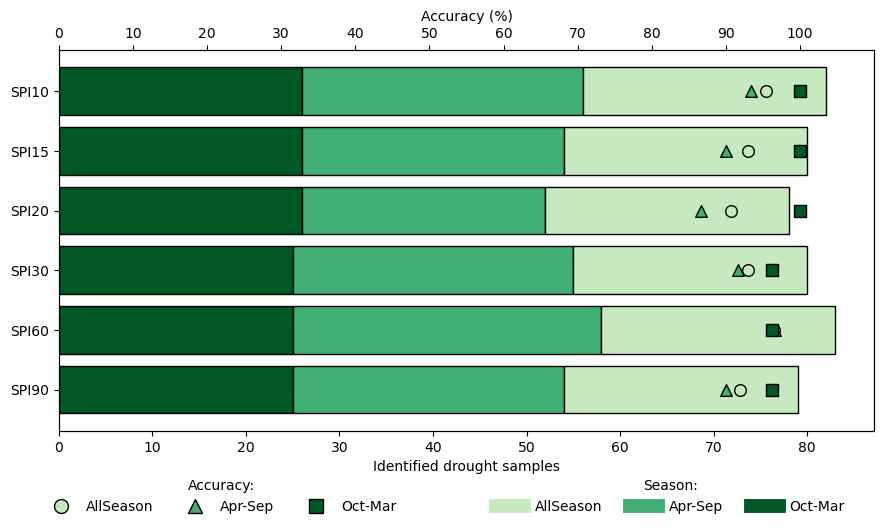

In [7]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# SPI time scales in descending order
order = [10, 15, 20, 30, 60, 90][::-1] 

# Colors
colors = {
    'AllSeason': '#C7E9C0',   # light green
    'AprSep':    '#41AE76',   # medium green
    'OctMar':    '#005824'    # dark green
}

# Accuracy symbols
markers = {
    'AllSeason': 'o',
    'AprSep': '^',
    'OctMar': 's'
}

fig, ax1 = plt.subplots(figsize=(9, 5.5))
y_pos = np.arange(len(order))

for i, scale in enumerate(order):
    df = final_summary[final_summary['scale'] == scale]

    # Identified values
    id_all = df[df['season'] == 'AllSeason']['identified'].values[0]
    id_apr = df[df['season'] == 'AprSep']['identified'].values[0]
    id_oct = df[df['season'] == 'OctMar']['identified'].values[0]

    # Δ segments (stacked)
    seg_all = id_all - id_apr       # paling muda
    seg_apr = id_apr - id_oct       # medium
    seg_oct = id_oct                # paling gelap

    # Plot bars
    ax1.barh(i, seg_oct, color=colors['OctMar'], edgecolor='black')
    ax1.barh(i, seg_apr, left=seg_oct, color=colors['AprSep'], edgecolor='black')
    ax1.barh(i, seg_all, left=seg_oct + seg_apr, color=colors['AllSeason'], edgecolor='black')

# Y labels
ax1.set_yticks(y_pos)
ax1.set_yticklabels([f"SPI{scale}" for scale in order])
ax1.set_xlabel("Identified drought samples")
# ax1.set_title("Accuracy and Identified Drought Samples per SPI Time-Scale and Season")

# Accuracy axis
ax2 = ax1.twiny()
ax2.set_xlim(0, 110)
ax2.set_xticks(np.arange(0, 110, 10))
ax2.set_xlabel("Accuracy (%)")

# Accuracy symbols
for i, scale in enumerate(order):
    df = final_summary[final_summary['scale'] == scale]
    for season in ['AllSeason','AprSep','OctMar']:
        acc = df[df['season'] == season]['accuracy'].values[0]
        ax2.scatter(acc, i, marker=markers[season], color=colors[season], s=70, edgecolors='black')

# Legend
from matplotlib.lines import Line2D

# Accuracy legend
accuracy_legend = [
    Line2D([0], [0], marker='o', color=colors['AllSeason'], linestyle='', markersize=10,
           markeredgecolor='black', label='AllSeason'),
    Line2D([0], [0], marker='^', color=colors['AprSep'], linestyle='', markersize=10,
           markeredgecolor='black', label='Apr-Sep'),
    Line2D([0], [0], marker='s', color=colors['OctMar'], linestyle='', markersize=10,
           markeredgecolor='black', label='Oct-Mar')
]

leg1 = ax1.legend(
    handles=accuracy_legend,
    title="Accuracy:",
    loc='lower center',
    bbox_to_anchor=(0.2, -0.25),
    ncol=3,
    frameon=False
)

# Add this so the next legend does not overwrite the first
ax1.add_artist(leg1)

# Identified drought samples legend
identified_legend = [
    Line2D([0], [0], color=colors['AllSeason'], lw=10, label='AllSeason'),
    Line2D([0], [0], color=colors['AprSep'], lw=10, label='Apr-Sep'),
    Line2D([0], [0], color=colors['OctMar'], lw=10, label='Oct-Mar')
]

leg2 = ax1.legend(
    handles=identified_legend,
    title="Season:",
    loc='lower center',
    bbox_to_anchor=(0.75, -0.25),   # placed below the first legend
    ncol=3,
    frameon=False
)

plt.tight_layout()
plt.show()


In [8]:
# Summary of case types for each SPI time scale

all_cases = []

for season_name, mask_func in season_filters.items():
    fname = f"data/dspi/identifikasi_kekeringan_SPI_rainfed_{method}_{season_name}.xlsx"
    try:
        df = pd.read_excel(fname)
        df["season"] = season_name
        all_cases.append(df)
    except Exception as e:
        print(f"Could not read {fname}: {e}")

if all_cases:
    df_all = pd.concat(all_cases, ignore_index=True)

    # Remove duplicates across seasons or scales if any
    df_all = df_all.drop_duplicates(subset=["id", "kecamatan", "scale", "note"])

    # Count the number of cases for each time scale and note type
    case_summary = (
        df_all.groupby(["scale", "note"], dropna=False)
        .size()
        .reset_index(name="count")
        .pivot(index="scale", columns="note", values="count")
        .fillna(0)
        .astype(int)
        .sort_index()
    )

    print("\nDistribution of case types across SPI time scales:")
    display(case_summary)

    out_case_summary = f"data/dspi/rekap_case_per_skala_SPI_{method}.xlsx"
    case_summary.to_excel(out_case_summary)

    print("\nCase-type summary saved to:")
    print(f"   {out_case_summary}")

else:
    print("No SPI drought identification results were found.")



Distribution of case types across SPI time scales:


note   case_a  case_b_single_segment  case_b_union_of_segments  \
scale                                                            
10         69                      7                         6   
15         60                     15                         5   
20         61                      8                         9   
30         67                     11                         2   
60         60                     18                         5   
90         50                     19                        10   

note   case_c_drought_free_in_actual_period  
scale                                        
10                                        4  
15                                        6  
20                                        8  
30                                        6  
60                                        3  
90                                        7


Case-type summary saved to:
   data/dspi/rekap_case_per_skala_SPI_p20.xlsx


In [9]:
import pandas as pd
import numpy as np

# Parameters
reference_scale = 10        # Spi time scale used as the reference index
scales = [10, 15, 20, 30, 60, 90]   # Spi scales to compare
# Method should be defined earlier (e.g., "p20")

# Load drought-identification results
spi_identified = pd.read_excel(
    f"data/dspi/identifikasi_kekeringan_SPI_rainfed_{method}_AllSeason.xlsx"
)

# Convert date columns and normalize subdistrict names
for c in ['onset_spi', 'end_spi', 'period_start', 'period_end']:
    if c in spi_identified.columns:
        spi_identified[c] = pd.to_datetime(spi_identified[c], errors='coerce')

spi_identified['kecamatan_norm'] = (
    spi_identified['kecamatan'].astype(str).str.lower().str.strip()
)

# Helper: determine whether SPI detected drought
def is_drought_detected(row):
    """Return true if onset_spi is valid."""
    return not pd.isna(row['onset_spi'])

spi_identified['is_drought'] = spi_identified.apply(is_drought_detected, axis=1)

# Extract reference-scale SPI drought flags
ref_df = spi_identified[spi_identified['scale'] == reference_scale].copy()
ref_df = ref_df[['id', 'kecamatan_norm', 'is_drought']]
ref_df = ref_df.rename(columns={'is_drought': f'is_drought_SPI{reference_scale}'})

records = []

# Compare each SPI scale against the reference
for scale in scales:
    if scale == reference_scale:
        continue

    df_cur = spi_identified[
        spi_identified['scale'] == scale
    ][['id', 'kecamatan_norm', 'is_drought']].copy()

    df_cur = df_cur.rename(columns={'is_drought': f'is_drought_SPI{scale}'})

    # Merge by event id and subdistrict
    merged = pd.merge(ref_df, df_cur, on=['id', 'kecamatan_norm'], how='inner')

    cur_col = f'is_drought_SPI{scale}'
    ref_col = f'is_drought_SPI{reference_scale}'

    # Current SPI says drought
    D_D  = np.sum((merged[cur_col] == True)  & (merged[ref_col] == True))
    D_DF = np.sum((merged[cur_col] == True)  & (merged[ref_col] == False))
    total_D = D_D + D_DF

    # Current SPI says drought-free
    DF_D  = np.sum((merged[cur_col] == False) & (merged[ref_col] == True))
    DF_DF = np.sum((merged[cur_col] == False) & (merged[ref_col] == False))
    total_DF = DF_D + DF_DF

    # Compute consistency metrics
    consistency_D  = (D_D  / total_D  * 100) if total_D  > 0 else np.nan
    consistency_DF = (DF_DF / total_DF * 100) if total_DF > 0 else np.nan

    # Store drought (D) statistics
    records.append({
        'Indices': f'SPI{scale}',
        'Type': 'D',
        f'Samples by SPI{reference_scale}_D': D_D,
        f'Samples by SPI{reference_scale}_DF': D_DF,
        'Total samples': total_D,
        'Consistency (%)': round(consistency_D, 2)
    })

    # Store drought-free (DF) statistics
    records.append({
        'Indices': f'SPI{scale}',
        'Type': 'DF',
        f'Samples by SPI{reference_scale}_D': DF_D,
        f'Samples by SPI{reference_scale}_DF': DF_DF,
        'Total samples': total_DF,
        'Consistency (%)': round(consistency_DF, 2)
    })

# Build final table
df_table1 = pd.DataFrame(records)
df_table1['scale'] = df_table1['Indices'].str.extract(r'(\d+)').astype(int)
df_table1 = df_table1.sort_values(by=['scale', 'Type']).reset_index(drop=True)

# Identify the most consistent scales
best_scale_D = (
    df_table1[df_table1['Type'] == 'D']
    .sort_values('Consistency (%)', ascending=False)
    .iloc[0]['Indices']
)

best_scale_DF = (
    df_table1[df_table1['Type'] == 'DF']
    .sort_values('Consistency (%)', ascending=False)
    .iloc[0]['Indices']
)

def mark_best(row):
    """Mark the highest-consistency SPI scales."""
    if row['Indices'] in [best_scale_D, best_scale_DF]:
        return "*"
    return ""

df_table1['Remark'] = df_table1.apply(mark_best, axis=1)

# Save output
out_fname = f"data/dspi/tabel1_konsistensi_SPI_vs_SPI{reference_scale}_{method}.xlsx"
df_table1.to_excel(out_fname, index=False)

print("\nZhang-style consistency table saved to:")
print(f"   {out_fname}\n")

print(df_table1.to_markdown(index=False))



Zhang-style consistency table saved to:
   data/dspi/tabel1_konsistensi_SPI_vs_SPI10_p20.xlsx

| Indices   | Type   |   Samples by SPI10_D |   Samples by SPI10_DF |   Total samples |   Consistency (%) |   scale | Remark   |
|:----------|:-------|---------------------:|----------------------:|----------------:|------------------:|--------:|:---------|
| SPI15     | D      |                   80 |                     0 |              80 |            100    |      15 | *        |
| SPI15     | DF     |                    2 |                     4 |               6 |             66.67 |      15 | *        |
| SPI20     | D      |                   78 |                     0 |              78 |            100    |      20 |          |
| SPI20     | DF     |                    4 |                     4 |               8 |             50    |      20 |          |
| SPI30     | D      |                   79 |                     1 |              80 |             98.75 |      30 |          |
|

In [10]:
# Performance evaluation of SPI accuracy and sensitivity (AllSeason, AprSep, OctMar)

import pandas as pd

# Main parameters
input_path = f"data/dspi/akurasi_sensitivitas_SPI_rainfed_{method}_allseason.xlsx"
output_dir = "data/dspi/"

# Step 1: Load the combined evaluation file
df = pd.read_excel(input_path)

# Step 2: Standardize column names to lowercase
df.columns = [c.lower().strip() for c in df.columns]

# Step 3: Define planting seasons to process
seasons = ["AllSeason", "AprSep", "OctMar"]

# Step 4: Process each season separately
all_tables = []

for season in seasons:
    if season.lower() not in df['season'].str.lower().unique():
        print(f"Data for {season} not found in the file.")
        continue

    # Filter data for the season
    df_season = df[df['season'].str.lower() == season.lower()].copy()

    # Rename columns to match Zhang-style tables
    df_season = df_season.rename(columns={
        'scale': 'spi time-scale (days)',
        'total': 'total droughts',
        'identified': 'identified by spi',
        'accuracy': 'accuracy (%)',
        'early_identified': 'early-identified by spi',
        'sensitivity': 'sensitivity (%)'
    })

    # Sort by SPI time scale
    df_season = df_season.sort_values(by='spi time-scale (days)').reset_index(drop=True)

    # Compute composite score
    df_season['composite score (%)'] = (
        (df_season['accuracy (%)'] + df_season['sensitivity (%)']) / 2
    ).round(2)

    # Identify the optimal SPI time scale
    max_composite = df_season['composite score (%)'].max()
    df_season['optimal?'] = df_season['composite score (%)'].apply(
        lambda x: '★' if x == max_composite else ''
    )

    # Store table with season included
    all_tables.append(df_season.assign(season=season))

    # Print markdown summary
    print(f"\nSPI performance evaluation and composite score ({season}):\n")
    print(df_season.to_markdown(index=False))

    # Save per-season table
    out_fname = f"{output_dir}/tabel_spi_akurasi_sensitivitas_{method}_composite_{season}.xlsx"
    df_season.to_excel(out_fname, index=False)
    print(f"Table saved to: {out_fname}\n")

# Step 5: Combine all seasonal results
if all_tables:
    df_combined = pd.concat(all_tables, ignore_index=True)

    out_combined = (
        f"{output_dir}/tabel_spi_akurasi_sensitivitas_{method}_composite_ALLSEASONS.xlsx"
    )
    df_combined.to_excel(out_combined, index=False)

    print("\nAll seasonal results combined and saved to:")
    print(f"   {out_combined}\n")

    # Summary of optimal SPI scales per season
    summary_opt = (
        df_combined[df_combined['optimal?'] == '★']
        [['season', 'spi time-scale (days)', 'composite score (%)']]
        .sort_values(by='season')
        .reset_index(drop=True)
    )

    print("\nOptimal SPI time scale per planting season:")
    print(summary_opt.to_markdown(index=False))



SPI performance evaluation and composite score (AllSeason):

|   spi time-scale (days) |   total droughts |   identified by spi |   early-identified by spi |   accuracy (%) |   sensitivity (%) | season    |   composite score (%) | optimal?   |
|------------------------:|-----------------:|--------------------:|--------------------------:|---------------:|------------------:|:----------|----------------------:|:-----------|
|                      10 |               86 |                  82 |                        66 |          95.35 |             80.49 | AllSeason |                 87.92 | ★          |
|                      15 |               86 |                  80 |                        56 |          93.02 |             70    | AllSeason |                 81.51 |            |
|                      20 |               86 |                  78 |                        58 |          90.7  |             74.36 | AllSeason |                 82.53 |            |
|                      

In [11]:
import pandas as pd

# Read accuracy and sensitivity results
df = pd.read_excel(f"data/dspi/akurasi_sensitivitas_SPI_rainfed_{method}_allseason.xlsx")

# Filter rows for AllSeason only
df_all = df[df['season'] == 'AllSeason'].copy()

# Rename columns to match Zhang-style terminology
df_all = df_all.rename(columns={
    'scale': 'SPI time-scale (days)',
    'identified': 'number of identified samples',
    'early_identified': 'number of early identified samples',
    'sensitivity': 'drought identification sensitivity (%)'
})

# Add total drought count column (optional, similar to Zhang et al.)
df_all['total drought samples (observed)'] = df_all['total']

# Sort table by SPI time scale
df_all = df_all.sort_values(by='SPI time-scale (days)').reset_index(drop=True)

# Select columns following Zhang et al. (2023) structure
table2 = df_all[[
    'SPI time-scale (days)',
    'number of identified samples',
    'number of early identified samples',
    'drought identification sensitivity (%)'
]]

# Save as Excel file
out_fname = f"data/dspi/tabel2_sensitivitas_SPI_rainfed_{method}.xlsx"
table2.to_excel(out_fname, index=False)

# Print table to console
print("\nZhang-style Table 2 saved to:")
print(f"   {out_fname}\n")
print(table2.to_markdown(index=False))



Zhang-style Table 2 saved to:
   data/dspi/tabel2_sensitivitas_SPI_rainfed_p20.xlsx

|   SPI time-scale (days) |   number of identified samples |   number of early identified samples |   drought identification sensitivity (%) |
|------------------------:|-------------------------------:|-------------------------------------:|-----------------------------------------:|
|                      10 |                             82 |                                   66 |                                    80.49 |
|                      15 |                             80 |                                   56 |                                    70    |
|                      20 |                             78 |                                   58 |                                    74.36 |
|                      30 |                             80 |                                   66 |                                    82.5  |
|                      60 |                             


Generating DIF plot for season: AllSeason


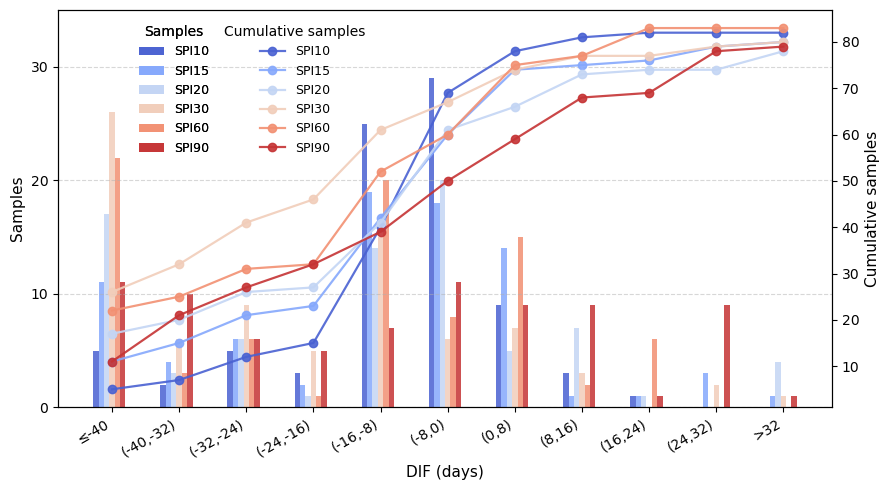

DIF figure for season AllSeason saved to:
   data/img/fig_DIF_distribution_SPI_p20_AllSeason.png

Generating DIF plot for season: AprSep


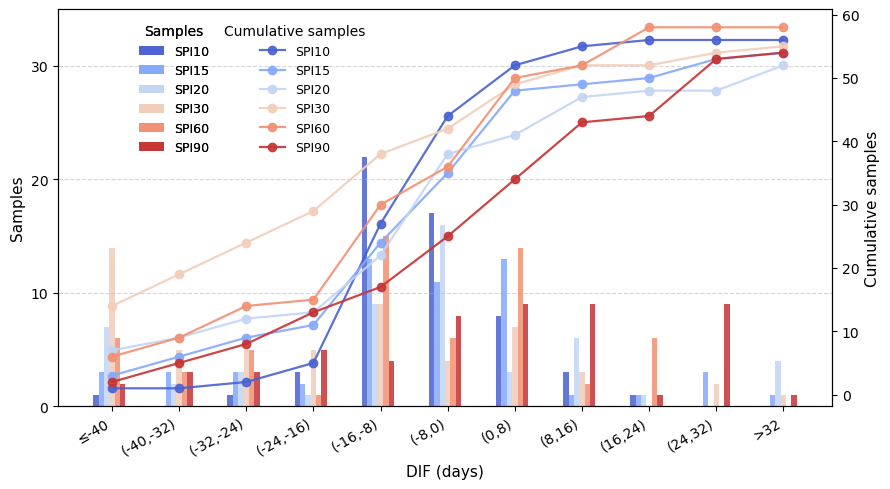

DIF figure for season AprSep saved to:
   data/img/fig_DIF_distribution_SPI_p20_AprSep.png

Generating DIF plot for season: OctMar


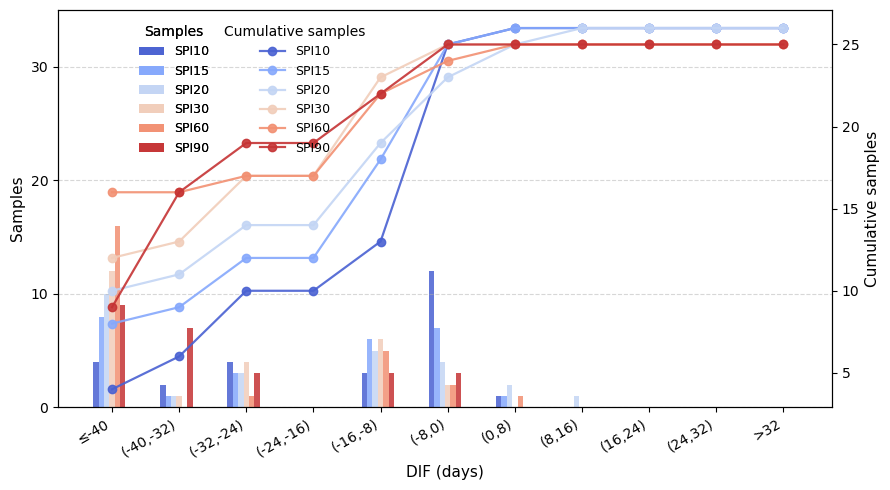

DIF figure for season OctMar saved to:
   data/img/fig_DIF_distribution_SPI_p20_OctMar.png


In [12]:
# Distribution of DIF for each planting season (AllSeason, AprSep, OctMar)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Main parameters
seasons = ["AllSeason", "AprSep", "OctMar"]

# Class intervals for DIF categories (following Zhang et al. 2023)
bins = [-999, -40, -32, -24, -16, -8, 0, 8, 16, 24, 32, 999]
labels = ["≤-40", "(-40,-32)", "(-32,-24)", "(-24,-16)", "(-16,-8)", "(-8,0)",
          "(0,8)", "(8,16)", "(16,24)", "(24,32)", ">32"]

# Loop over planting seasons
for season_name in seasons:
    print(f"\nGenerating DIF plot for season: {season_name}")

    # Read SPI identification results
    fpath = f"data/dspi/identifikasi_kekeringan_SPI_rainfed_{method}_{season_name}.xlsx"
    try:
        spi_identified_df = pd.read_excel(fpath)
    except FileNotFoundError:
        print(f"File not found: {fpath}")
        continue

    # Ensure datetime columns
    for c in ['onset_spi', 'period_start']:
        spi_identified_df[c] = pd.to_datetime(spi_identified_df[c], errors='coerce')

    # Compute DIF in days
    spi_identified_df['DIF_days'] = (
        spi_identified_df['onset_spi'] - spi_identified_df['period_start']
    ).dt.days

    # Classify DIF into predefined categories
    spi_identified_df['DIF_class'] = pd.cut(
        spi_identified_df['DIF_days'], bins=bins, labels=labels, right=True
    )

    # Compute frequency and cumulative distribution for each SPI scale
    scales = sorted(spi_identified_df['scale'].unique())
    bar_data, line_data = [], []

    for scale in scales:
        subset = spi_identified_df[spi_identified_df['scale'] == scale]
        freq = subset['DIF_class'].value_counts().reindex(labels, fill_value=0)
        cum = freq.cumsum()
        bar_data.append(freq)
        line_data.append(cum)

    bar_df = pd.DataFrame(bar_data, index=scales, columns=labels)
    line_df = pd.DataFrame(line_data, index=scales, columns=labels)

    # Set up figure and axes
    fig, ax1 = plt.subplots(figsize=(9, 5))
    ax2 = ax1.twinx()

    # Create color palette
    colors = plt.cm.coolwarm(np.linspace(0.05, 0.95, len(scales)))

    # Plot grouped bars and cumulative lines
    width = 0.08
    x = np.arange(len(labels))
    bar_handles, line_handles = [], []

    for i, scale in enumerate(scales):

        # Bars
        bars = ax1.bar(
            x + (i - len(scales)/2) * width,
            bar_df.loc[scale],
            width=width,
            color=colors[i],
            alpha=0.85,
            edgecolor='none'
        )
        bar_handles.append(bars[0])

        # Cumulative lines
        line, = ax2.plot(
            x,
            line_df.loc[scale],
            color=colors[i],
            lw=1.6,
            marker='o',
            alpha=0.9
        )
        line_handles.append(line)

    # Format axes and labels
    ax1.set_xlabel("DIF (days)", fontsize=11)
    ax1.set_ylabel("Samples", fontsize=11)
    ax1.set_ylim(0, 35)
    ax2.set_ylabel("Cumulative samples", fontsize=11)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=30, ha='right')
    ax1.grid(axis='y', linestyle='--', alpha=0.5)
    ax1.yaxis.set_major_locator(MultipleLocator(10))

    # Legends
    legend1 = ax1.legend(
        bar_handles,
        [f"SPI{int(s)}" for s in scales],
        title="Samples",
        loc="upper left",
        bbox_to_anchor=(0.09, 0.99),
        fontsize=9,
        title_fontsize=10,
        frameon=False
    )

    legend2 = ax2.legend(
        line_handles,
        [f"SPI{int(s)}" for s in scales],
        title="Cumulative samples",
        loc="upper left",
        bbox_to_anchor=(0.20, 0.99),
        fontsize=9,
        title_fontsize=10,
        frameon=False
    )
    fig.add_artist(legend1)

    # Title and layout
    # plt.title(
    #     f"Distribution of drought onset date differences (DIF) – {season_name}",
    #     fontsize=13
    # )
    plt.tight_layout()

    # Save output
    out_img = f"data/img/fig_DIF_distribution_SPI_{method}_{season_name}.png"
    plt.savefig(out_img, dpi=600, bbox_inches="tight")
    plt.show()

    print(f"DIF figure for season {season_name} saved to:")
    print(f"   {out_img}")


In [14]:
import pandas as pd
import numpy as np

# Basic parameters
labels = ["≤-40", "(-40,-32]", "(-32,-24]", "(-24,-16]", "(-16,-8]", "(-8,0]",
          "(0,8]", "(8,16]", "(16,24]", "(24,32]", ">32"]

bins = [-999, -40, -32, -24, -16, -8, 0, 8, 16, 24, 32, 999]

# Load SPI identification results
fname = f"data/dspi/identifikasi_kekeringan_SPI_rainfed_{method}_AllSeason.xlsx"
df = pd.read_excel(fname)

# Ensure datetime format
df['onset_spi'] = pd.to_datetime(df['onset_spi'], errors='coerce')
df['period_start'] = pd.to_datetime(df['period_start'], errors='coerce')

# Compute DIF in days
df['DIF_days'] = (df['onset_spi'] - df['period_start']).dt.days

# Remove missing values
df = df.dropna(subset=['DIF_days', 'scale'])

# Classify DIF into intervals
df['DIF_cat'] = pd.cut(
    df['DIF_days'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Count number of cases per scale and category
count_table = (
    df.groupby(['scale', 'DIF_cat'])
      .size()
      .reset_index(name='count')
      .pivot(index='scale', columns='DIF_cat', values='count')
      .fillna(0)
      .astype(int)
)

# Compute totals and percentages
count_table['Total'] = count_table.sum(axis=1)
ratio_table = (count_table.div(count_table['Total'], axis=0) * 100).round(2)

# Display results
print("\nDistribution of case counts by DIF category (days):")
display(count_table)

print("\nDistribution of percentage by DIF category:")
display(ratio_table)

# Save to Excel
out_fname = f"data/dspi/distribusi_DIF_per_skala_{method}_AllSeason.xlsx"
with pd.ExcelWriter(out_fname) as writer:
    count_table.to_excel(writer, sheet_name='Counts')
    ratio_table.to_excel(writer, sheet_name='Percentage')

print(f"\nDIF distribution results saved to: {out_fname}")



Distribution of case counts by DIF category (days):


/var/folders/9g/y4lb5z2j2jg8m_dmhp5c6bjh0000gn/T/ipykernel_5847/87456948.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['scale', 'DIF_cat'])


DIF_cat  ≤-40  (-40,-32]  (-32,-24]  (-24,-16]  (-16,-8]  (-8,0]  (0,8]  \
scale                                                                     
10          5          2          5          3        25      29      9   
15         11          4          6          2        19      18     14   
20         17          3          6          1        14      20      5   
30         26          6          9          5        15       6      7   
60         22          3          6          1        20       8     15   
90         11         10          6          5         7      11      9   

DIF_cat  (8,16]  (16,24]  (24,32]  >32  Total  
scale                                          
10            3        1        0    0     82  
15            1        1        3    1     80  
20            7        1        0    4     78  
30            3        0        2    1     80  
60            2        6        0    0     83  
90            9        1        9    1     79


Distribution of percentage by DIF category:


DIF_cat   ≤-40  (-40,-32]  (-32,-24]  (-24,-16]  (-16,-8]  (-8,0]  (0,8]  \
scale                                                                      
10        6.10       2.44       6.10       3.66     30.49   35.37  10.98   
15       13.75       5.00       7.50       2.50     23.75   22.50  17.50   
20       21.79       3.85       7.69       1.28     17.95   25.64   6.41   
30       32.50       7.50      11.25       6.25     18.75    7.50   8.75   
60       26.51       3.61       7.23       1.20     24.10    9.64  18.07   
90       13.92      12.66       7.59       6.33      8.86   13.92  11.39   

DIF_cat  (8,16]  (16,24]  (24,32]   >32  Total  
scale                                           
10         3.66     1.22     0.00  0.00  100.0  
15         1.25     1.25     3.75  1.25  100.0  
20         8.97     1.28     0.00  5.13  100.0  
30         3.75     0.00     2.50  1.25  100.0  
60         2.41     7.23     0.00  0.00  100.0  
90        11.39     1.27    11.39  1.27  100.0


DIF distribution results saved to: data/dspi/distribusi_DIF_per_skala_p20_AllSeason.xlsx



Generating boxplot and DIF statistics for season: AllSeason

DIF descriptive statistics (AllSeason):
|   SPI scale |   Count |   Mean |   Std |   Min |   Q1 (25%) |   Median (50%) |   Q3 (75%) |   Max |   IQR |
|------------:|--------:|-------:|------:|------:|-----------:|---------------:|-----------:|------:|------:|
|          10 |      82 | -10.21 | 15.51 |   -66 |     -14    |           -6.5 |      -1.25 |    24 | 12.75 |
|          15 |      80 | -13.18 | 23.36 |   -66 |     -24.25 |           -8   |       0.25 |    34 | 24.5  |
|          20 |      78 | -16.42 | 29.45 |   -79 |     -31.75 |           -9   |      -0.25 |    50 | 31.5  |
|          30 |      80 | -26.11 | 27.27 |   -75 |     -45    |          -24.5 |      -8.75 |    43 | 36.25 |
|          60 |      83 | -25.54 | 42.81 |  -198 |     -42    |          -14   |       1    |    21 | 43    |
|          90 |      79 | -17.34 | 42.55 |  -169 |     -32.5  |           -7   |       8.5  |    36 | 41    |
Statistics table s

/var/folders/9g/y4lb5z2j2jg8m_dmhp5c6bjh0000gn/T/ipykernel_5847/3122721105.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


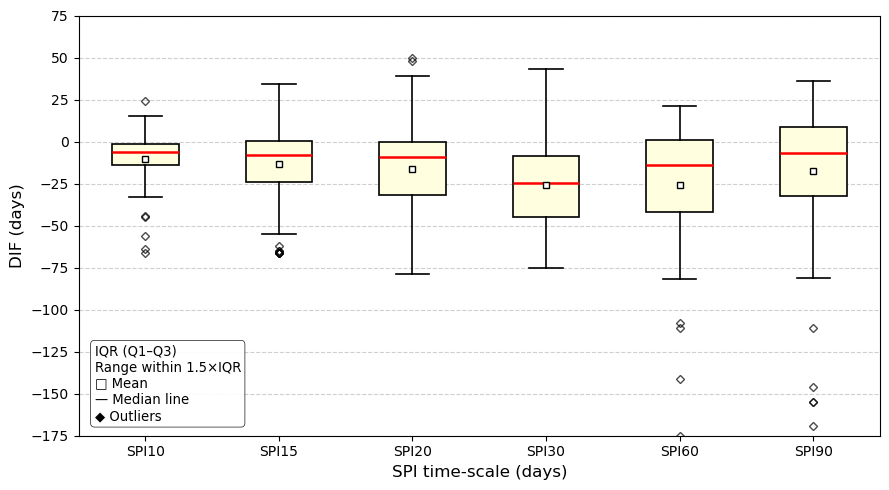

Boxplot saved to: data/img/fig_boxplot_DIF_SPI_p20_AllSeason.png

Generating boxplot and DIF statistics for season: AprSep

DIF descriptive statistics (AprSep):
|   SPI scale |   Count |   Mean |   Std |   Min |   Q1 (25%) |   Median (50%) |   Q3 (75%) |   Max |   IQR |
|------------:|--------:|-------:|------:|------:|-----------:|---------------:|-----------:|------:|------:|
|          10 |      56 |  -6.68 | 12.31 |   -64 |     -13    |             -6 |       0    |    24 | 13    |
|          15 |      54 |  -7    | 19.14 |   -62 |     -12    |             -6 |       2    |    34 | 14    |
|          20 |      52 |  -8.54 | 25.72 |   -65 |     -14.75 |             -6 |       4    |    50 | 18.75 |
|          30 |      55 | -19.33 | 24.46 |   -72 |     -39.5  |            -21 |      -3.5  |    43 | 36    |
|          60 |      58 | -11.97 | 24.11 |  -108 |     -15.75 |             -9 |       2.75 |    21 | 18.5  |
|          90 |      54 |  -0.65 | 23.6  |   -79 |     -14.75 |      

/var/folders/9g/y4lb5z2j2jg8m_dmhp5c6bjh0000gn/T/ipykernel_5847/3122721105.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


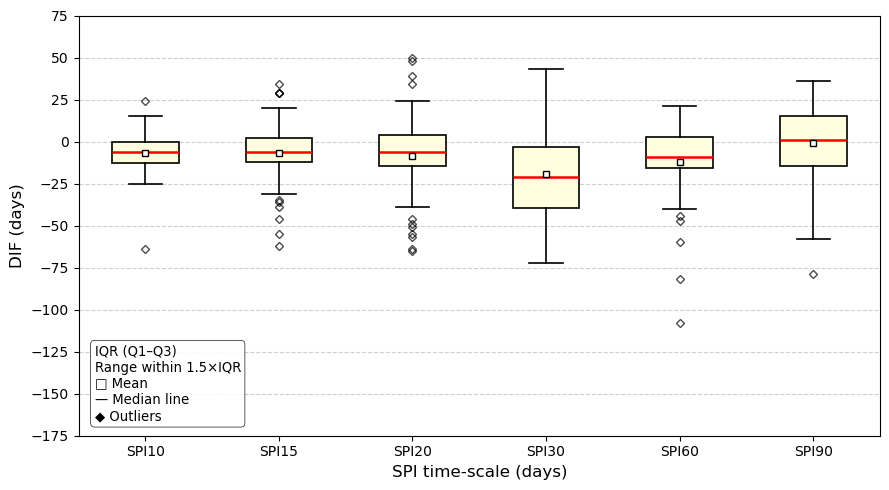

Boxplot saved to: data/img/fig_boxplot_DIF_SPI_p20_AprSep.png

Generating boxplot and DIF statistics for season: OctMar

DIF descriptive statistics (OctMar):
|   SPI scale |   Count |   Mean |   Std |   Min |   Q1 (25%) |   Median (50%) |   Q3 (75%) |   Max |   IQR |
|------------:|--------:|-------:|------:|------:|-----------:|---------------:|-----------:|------:|------:|
|          10 |      26 | -17.81 | 18.92 |   -66 |      -29   |           -7.5 |      -5    |     6 | 24    |
|          15 |      26 | -26    | 26.35 |   -66 |      -50   |          -13   |      -4.25 |     6 | 45.75 |
|          20 |      26 | -32.19 | 30.54 |   -79 |      -65.5 |          -26   |      -6    |     9 | 59.5  |
|          30 |      25 | -41.04 | 27.64 |   -75 |      -71   |          -39   |     -11    |    -5 | 60    |
|          60 |      25 | -57.04 | 58.33 |  -198 |      -56   |          -45   |     -10    |     4 | 46    |
|          90 |      25 | -53.4  | 51.69 |  -169 |      -55   |         

/var/folders/9g/y4lb5z2j2jg8m_dmhp5c6bjh0000gn/T/ipykernel_5847/3122721105.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


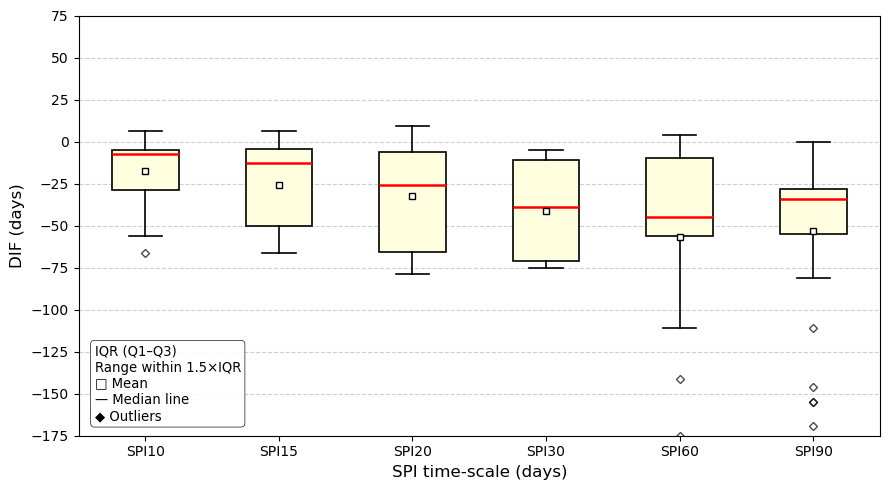

Boxplot saved to: data/img/fig_boxplot_DIF_SPI_p20_OctMar.png


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Main parameters
seasons = ["AllSeason", "AprSep", "OctMar"]

# Loop over each planting season
for season_name in seasons:
    print(f"\nGenerating boxplot and DIF statistics for season: {season_name}")

    # Load SPI identification output
    fpath = f"data/dspi/identifikasi_kekeringan_SPI_rainfed_{method}_{season_name}.xlsx"
    try:
        df = pd.read_excel(fpath)
    except FileNotFoundError:
        print(f"File not found: {fpath}")
        continue

    # Ensure datetime format and compute DIF
    for c in ['onset_spi', 'period_start']:
        df[c] = pd.to_datetime(df[c], errors='coerce')

    df['DIF_days'] = (df['onset_spi'] - df['period_start']).dt.days
    df = df.dropna(subset=['DIF_days', 'scale'])

    if df.empty:
        print(f"No valid data for season: {season_name}")
        continue

    # Compute descriptive statistics for each SPI time scale
    stats_list = []
    for scale in sorted(df['scale'].unique()):
        subset = df.loc[df['scale'] == scale, 'DIF_days']
        desc = {
            "SPI scale": scale,
            "Count": len(subset),
            "Mean": round(subset.mean(), 2),
            "Std": round(subset.std(), 2),
            "Min": round(subset.min(), 2),
            "Q1 (25%)": round(subset.quantile(0.25), 2),
            "Median (50%)": round(subset.median(), 2),
            "Q3 (75%)": round(subset.quantile(0.75), 2),
            "Max": round(subset.max(), 2),
            "IQR": round(subset.quantile(0.75) - subset.quantile(0.25), 2)
        }
        stats_list.append(desc)

    stats_df = pd.DataFrame(stats_list)
    stats_df = stats_df.sort_values(by="SPI scale").reset_index(drop=True)

    # Print descriptive statistics
    print(f"\nDIF descriptive statistics ({season_name}):")
    print(stats_df.to_markdown(index=False))

    # Save statistics table
    out_table = f"data/dspi/tabel_statistik_boxplot_DIF_SPI_{method}_{season_name}.xlsx"
    stats_df.to_excel(out_table, index=False)
    print(f"Statistics table saved to: {out_table}")

    # Prepare data for boxplot
    scales = sorted(df['scale'].unique())
    data_for_plot = [df.loc[df['scale'] == s, 'DIF_days'].values for s in scales]

    # Create boxplot
    fig, ax = plt.subplots(figsize=(9, 5))
    boxprops = dict(facecolor='lightyellow', color='black', linewidth=1.2)
    medianprops = dict(color='red', linewidth=1.8)
    meanprops = dict(marker='s', markerfacecolor='white', markeredgecolor='black', markersize=5)
    whiskerprops = dict(color='black', linestyle='-', linewidth=1.2)
    capprops = dict(color='black', linewidth=1.2)
    flierprops = dict(marker='D', markersize=4, color='black', alpha=0.7)

    bp = ax.boxplot(
        data_for_plot,
        patch_artist=True,
        labels=[f"SPI{s}" for s in scales],
        boxprops=boxprops,
        medianprops=medianprops,
        meanprops=meanprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        flierprops=flierprops,
        showmeans=True
    )

    ax.set_ylabel("DIF (days)", fontsize=12)
    ax.set_xlabel("SPI time-scale (days)", fontsize=12)
    # ax.set_title(f"Boxplot of drought onset date differences (DIF) – {season_name}", fontsize=13)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.set_ylim(-175, 75)
    ax.set_yticks(np.arange(-175, 76, 25))
    ax.tick_params(axis='x', rotation=0)

    legend_text = (
        "IQR (Q1–Q3)\n"
        "Range within 1.5×IQR\n"
        "□ Mean\n"
        "— Median line\n"
        "◆ Outliers"
    )
    props = dict(boxstyle='round', facecolor='white', alpha=0.9, lw=0.5)
    ax.text(
        0.02, 0.03, legend_text,
        transform=ax.transAxes,
        fontsize=9.5,
        verticalalignment='bottom',
        bbox=props
    )

    plt.tight_layout()
    out_plot = f"data/img/fig_boxplot_DIF_SPI_{method}_{season_name}.png"
    plt.savefig(out_plot, dpi=600, bbox_inches='tight')
    plt.show()

    print(f"Boxplot saved to: {out_plot}")


In [ ]:
# Visualization of multiple SPI drought segments for a given event
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.dates import DateFormatter

def visualize_segments(kecamatan, scale, spi_dict, drought_row, threshold=-0.5, save_path=None):
    """
    Visualize the SPI time series for one drought event and highlight
    all SPI ≤ threshold segments, including cases with multiple segments.
    
    Parameters
    ----------
    kecamatan : str
        Subdistrict name, must match column names in spi_dict[scale].
    scale : int
        SPI time scale (e.g., 15, 30, 60).
    spi_dict : dict
        Dictionary containing SPI dataframes for different time scales.
    drought_row : pd.Series
        Row from drought_samples containing period_start and period_end.
    threshold : float, default=-0.5
        SPI threshold used to define drought conditions.
    save_path : str or None
        File path to save the figure. If None, the plot is displayed.
    """

    # Extract SPI series for the given subdistrict and time window
    spi_series = spi_dict[scale][kecamatan]
    start = pd.to_datetime(drought_row['period_start'])
    end = pd.to_datetime(drought_row['period_end'])
    spi_series = spi_series.loc[start - pd.Timedelta(days=60) :
                                end + pd.Timedelta(days=60)]

    # Detect all continuous segments where SPI ≤ threshold
    below = spi_series <= threshold
    if not below.any():
        print(f"No SPI values ≤ {threshold} for {kecamatan}, SPI{scale}.")
        return

    change_points = below.ne(below.shift()).cumsum()
    segments = []
    for seg_id, seg_mask in below.groupby(change_points):
        if seg_mask.any():
            s_start = seg_mask.index.min()
            s_end = seg_mask.index.max()
            segments.append((s_start, s_end))

    # Create time-series plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(spi_series.index, spi_series.values, color='black', lw=1.2, label=f"SPI{scale}")

    # Plot threshold line
    ax.axhline(threshold, color='red', lw=1, linestyle='--', label=f"Threshold ({threshold})")

    # Highlight detected SPI drought segments
    cmap = plt.cm.get_cmap("YlOrBr", len(segments))
    for i, (s_start, s_end) in enumerate(segments):
        ax.axvspan(s_start, s_end, color=cmap(i), alpha=0.45,
                   label=f"Segment {i+1} (DOY {s_start.timetuple().tm_yday}-{s_end.timetuple().tm_yday})")

    # Highlight actual reported drought period
    ax.axvspan(start, end, color='black', alpha=0.3, label="Observed drought period")

    # Axis formatting
    ax.set_title(
        f"SPI{scale} time series – {kecamatan}\nObserved drought: {start.date()} to {end.date()}",
        fontsize=11
    )
    ax.set_ylabel("SPI", fontsize=10)
    ax.set_xlabel("Date", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.set_major_formatter(DateFormatter("%b-%d"))
    ax.set_ylim(-3, 2)

    # Clean legend by removing duplicates
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="lower right", fontsize=8, frameon=True)

    plt.tight_layout()

    # Save or display the figure
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches="tight")
        plt.close()
        print(f"Saved: {save_path}")
    else:
        plt.show()

    # Print summary of detected segments
    print(f"{kecamatan} | SPI{scale} | {len(segments)} segments detected")
    for i, (s_start, s_end) in enumerate(segments):
        print(f"   Segment {i+1}: {s_start.date()} to {s_end.date()} "
              f"(DOY {s_start.timetuple().tm_yday}-{s_end.timetuple().tm_yday})")
        
# Example usage of the visualization function
kec = 'Patuk'
target_date = pd.to_datetime("2024-06-16")

drow = drought_samples[
    (drought_samples["kecamatan"].str.contains(kec, case=False)) &
    (drought_samples["period_start"].dt.date == target_date.date())
].iloc[0]

visualize_segments(
    kecamatan=kec,
    scale=10,
    spi_dict=spi_dict,
    drought_row=drow,
    threshold=-0.5
)




Plotting SPI drought segments for ZOM 269 in year 2018...

ZOM 269, Tahun 2018 → 0 kejadian ditemukan


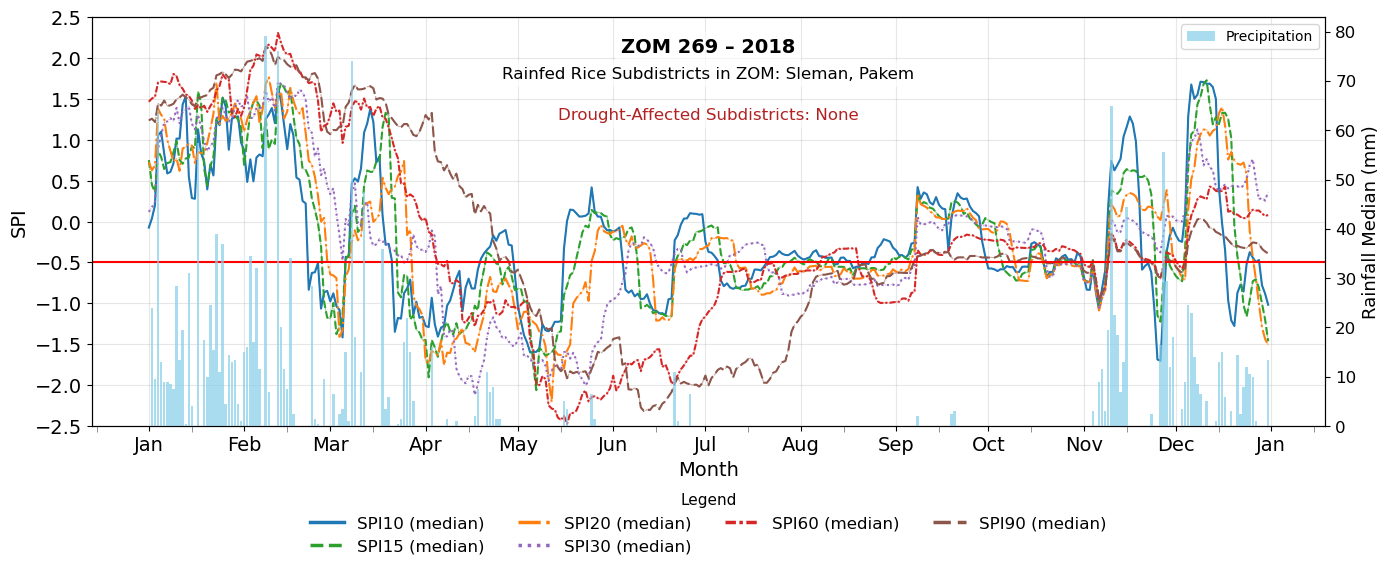


Plotting SPI drought segments for ZOM 269 in year 2019...

ZOM 269, Tahun 2019 → 1 kejadian ditemukan


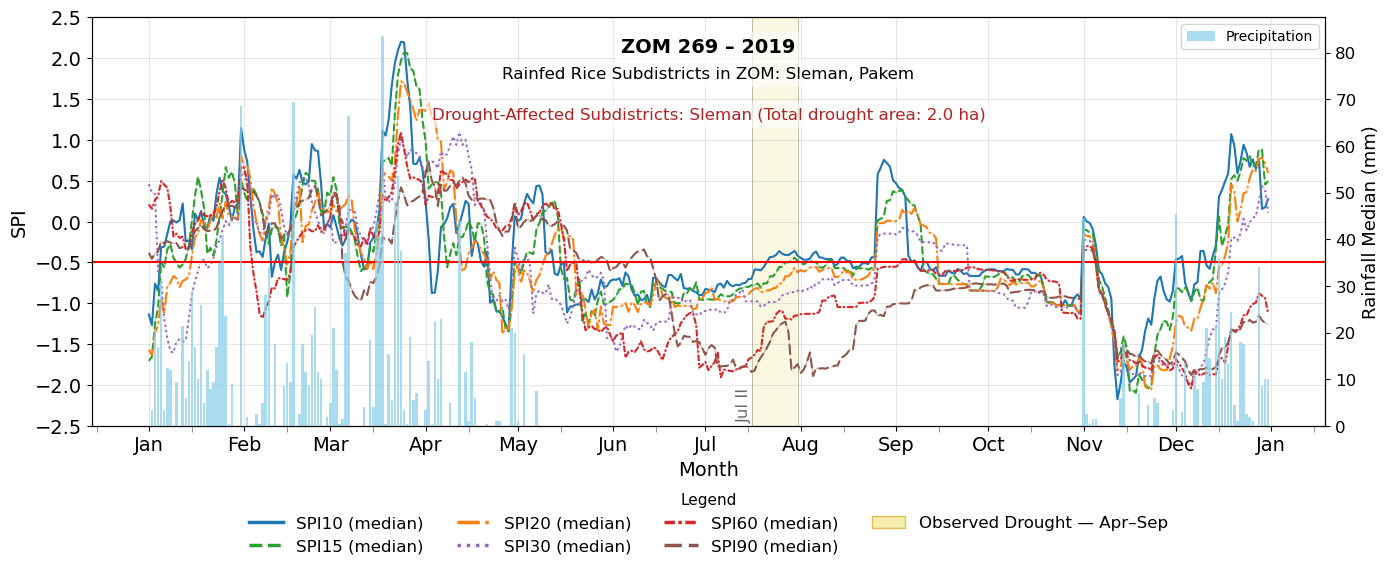


Plotting SPI drought segments for ZOM 269 in year 2020...

ZOM 269, Tahun 2020 → 0 kejadian ditemukan


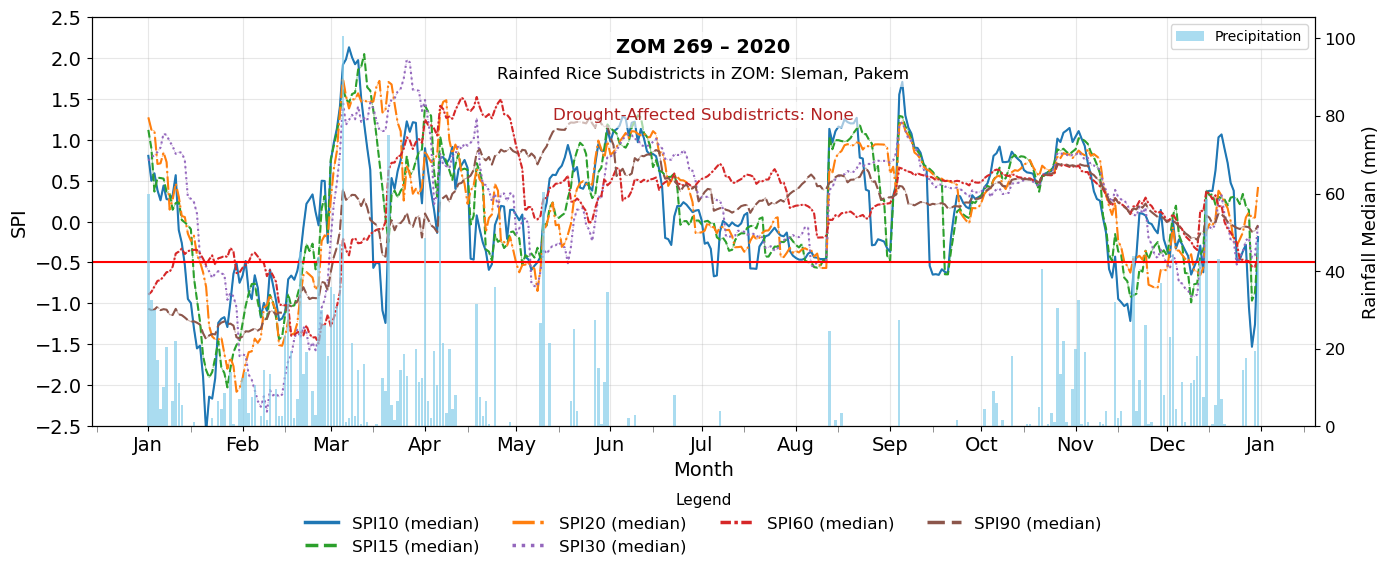


Plotting SPI drought segments for ZOM 269 in year 2021...

ZOM 269, Tahun 2021 → 0 kejadian ditemukan


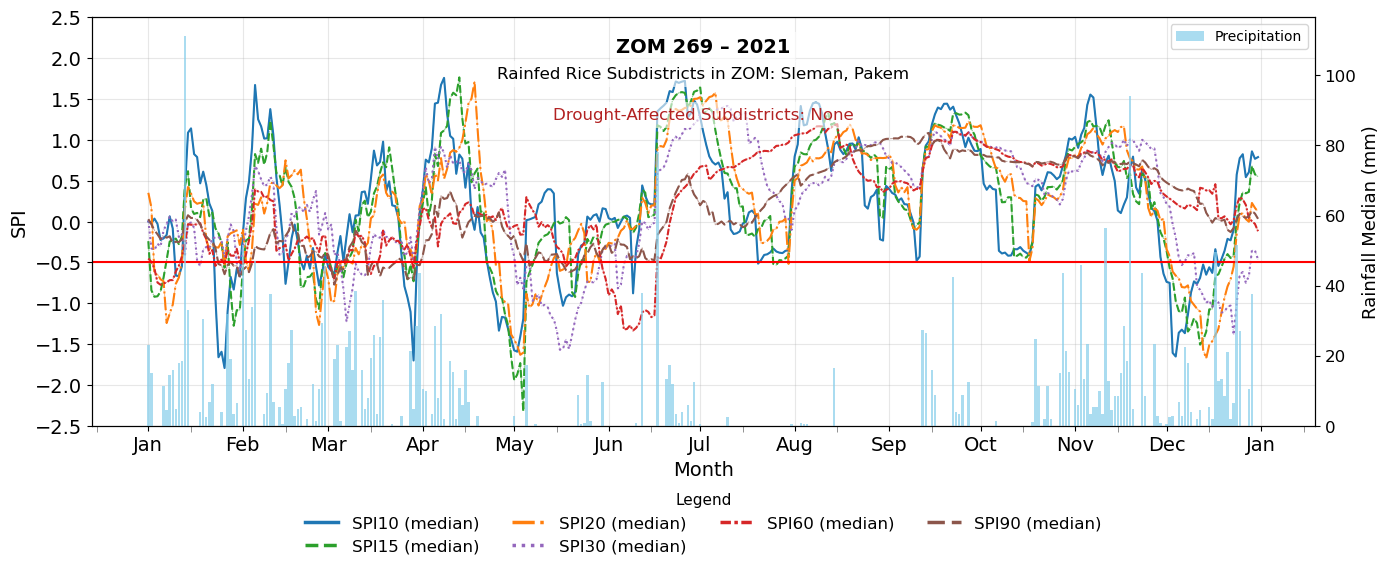


Plotting SPI drought segments for ZOM 269 in year 2022...

ZOM 269, Tahun 2022 → 0 kejadian ditemukan


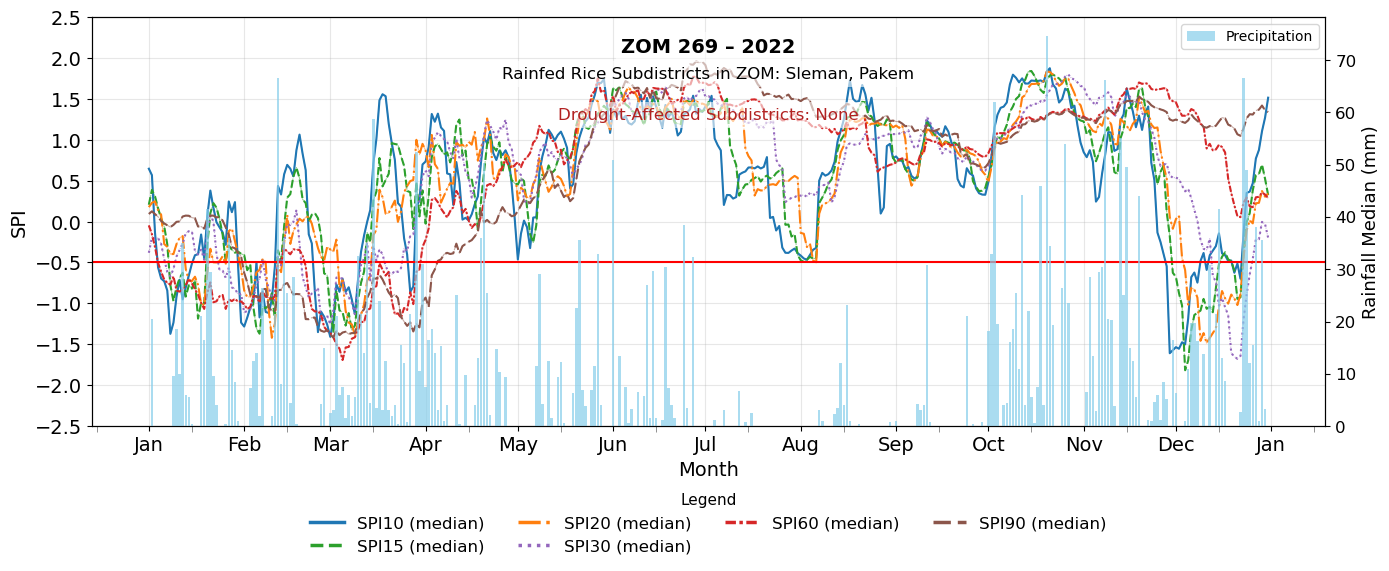


Plotting SPI drought segments for ZOM 269 in year 2023...

ZOM 269, Tahun 2023 → 1 kejadian ditemukan


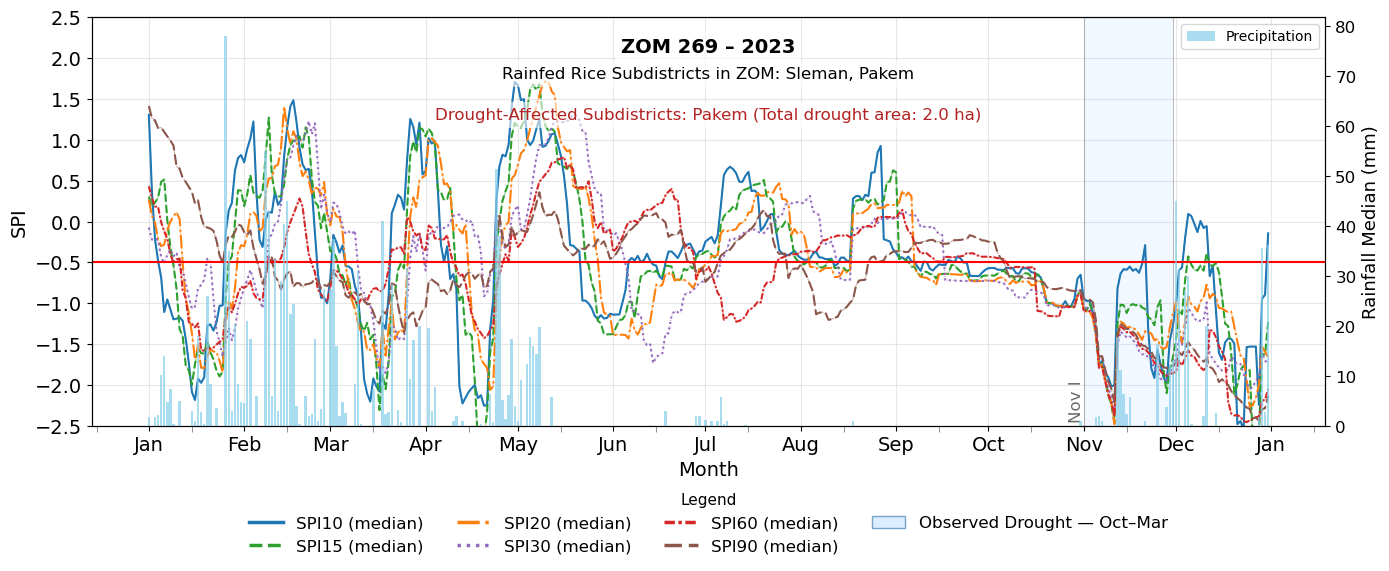


Plotting SPI drought segments for ZOM 269 in year 2024...

ZOM 269, Tahun 2024 → 1 kejadian ditemukan


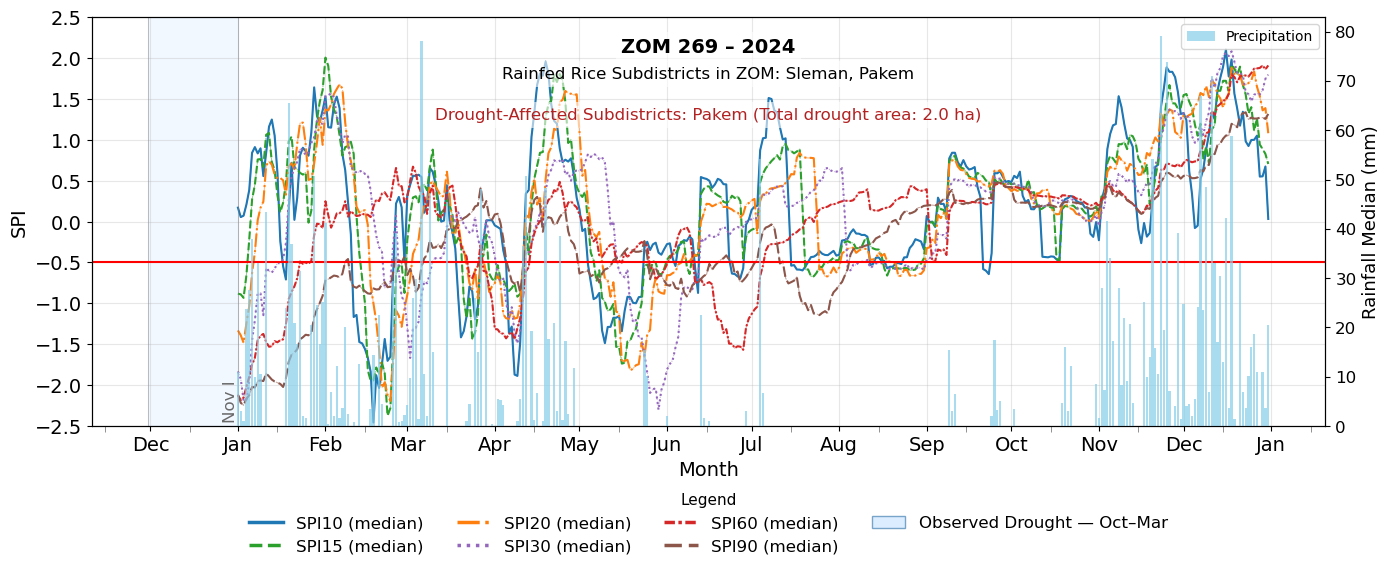

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# Fixed color per scale
spi_color_map = {
    10: "#1f77b4",  # blue
    15: "#2ca02c",  # green
    20: "#ff7f0e",  # orange
    30: "#9467bd",  # purple
    60: "#d62728",  # red
    90: "#8c564b",  # brown
}

# Fixed linestyle per scale
spi_linestyle_map = {
    10: "-",
    15: "--",
    20: "-.",
    30: ":",
    60: (0,(3,1,1,1)),   # custom dash
    90: (0,(5,2)),       # another custom dash
}

# Half-month label
def halfmonth_label(dt):
    if pd.isna(dt):
        return None
    return f"{calendar.month_abbr[dt.month]} {'I' if dt.day <= 15 else 'II'}"

# Assign season based on month
def assign_season(dt):
    m = dt.month
    return "Apr-Sep" if 4 <= m <= 9 else "Oct-Mar"

# Load data
# Load shapefile to get list of subdistricts in rainfed rice ZOM
shp_sawah = gpd.read_file("data/shp/sawah_tadah_hujan_kecamatan.shp")
sawah_kec_list = (
    shp_sawah['WADMKC']
    .str.strip()
    .str.lower()
    .unique()
    .tolist()
)

# Load drought samples
droughtsamples = pd.read_excel("data/dataset_kekeringan_2018-2024.xlsx")
droughtsamples["period_start"] = pd.to_datetime(droughtsamples["period_start"])
droughtsamples["period_end"]   = pd.to_datetime(droughtsamples["period_end"])
droughtsamples["season"]       = droughtsamples["period_start"].apply(assign_season)

# Filter drought samples to only those in rainfed rice ZOM subdistricts
droughtsamples["kecamatan_norm"] = droughtsamples["kecamatan"].str.strip().str.lower()
droughtsamples = droughtsamples[
    droughtsamples["kecamatan_norm"].isin(sawah_kec_list)
].copy()

# Filter ZOM groups only for kecamatan with sawah
zom_groups = {}

for zom, kec_list in droughtsamples.groupby("zom")["kecamatan_norm"]:
    filtered = [k for k in kec_list.unique().tolist() if k in sawah_kec_list]
    if len(filtered) > 0:
        zom_groups[zom] = filtered

# Collect drought events a ZOM experiences in a given year
def get_drought_events_for_zom_year(drought_samples, zom_id, year):

    ds = drought_samples[drought_samples["zom"] == zom_id].copy()

    # Apr–Sep season within the same year
    aprsep = ds[
        (ds["period_start"] >= f"{year}-04-01") &
        (ds["period_start"] <= f"{year}-09-30")
    ].copy()

    # Oct–Mar season that spills into this year (year-1 → year)
    oktmar_prev = ds[
        (ds["period_start"] >= f"{year-1}-10-01") &
        (ds["period_start"] <= f"{year}-03-31")
    ].copy()

    # Oct–Mar season starting this year (year → year+1)
    oktmar_next = ds[
        (ds["period_start"] >= f"{year}-10-01") &
        (ds["period_start"] <= f"{year+1}-03-31")
    ].copy()

    return pd.concat([aprsep, oktmar_prev, oktmar_next], ignore_index=True)


# Main Plot Function
def plot_spi_zom_year(zom_id, year, spi_dict, drought_samples, kecamatan_zom, metadata, data_daily):

    kec_list = kecamatan_zom[zom_id]

    # Year range
    start_year = pd.Timestamp(f"{year}-01-01")
    end_year   = pd.Timestamp(f"{year}-12-31")

    spi_scales = sorted(spi_dict.keys())

    fig, ax = plt.subplots(figsize=(14,6))

    # Plot each kecamatan (thin lines)
    for c in kec_list:
        for scale in spi_scales:
            if c not in spi_dict[scale]:
                continue

            ser = spi_dict[scale][c].loc[start_year:end_year]

            ax.plot(
                ser.index,
                ser.values,
                color=spi_color_map.get(scale, "black"),
                linestyle=spi_linestyle_map.get(scale, "-"),
                lw=0.8,
                alpha=0.5
            )

    # Add Median Line per SPI scale
    for scale in spi_scales:

        # Collect all kecamatan SPI series into a matrix
        spi_matrix = []
        for c in kec_list:
            if c in spi_dict[scale]:
                ser = spi_dict[scale][c].loc[start_year:end_year]
                spi_matrix.append(ser.values)

        if len(spi_matrix) == 0:
            continue

        # Calculate median across kecamatan (axis=0)
        spi_matrix = np.vstack(spi_matrix)
        median_spi = np.nanmedian(spi_matrix, axis=0)

        # Plot median line
        ax.plot(
            ser.index,  # All series have the same index
            median_spi,
            color=spi_color_map.get(scale, "black"),
            linestyle=spi_linestyle_map.get(scale, "-"),
            lw=1.5,
            label=f"SPI{scale} (median)"
        )

    # Overlay drought events + track which seasons appear
    events = get_drought_events_for_zom_year(drought_samples, zom_id, year)

    season_present = {"Apr-Sep": False, "Oct-Mar": False}

    for _, row in events.iterrows():

        shade_color = "khaki" if row["season"] == "Apr-Sep" else "#CEE6FF"
        shade_start = max(row["period_start"], start_year)
        shade_end   = min(row["period_end"], end_year)

        ax.axvspan(shade_start, shade_end, color=shade_color, alpha=0.25)

        ax.axvline(shade_start, color="gray", lw=0.7, alpha=0.5)
        ax.axvline(shade_end,   color="gray", lw=0.7, alpha=0.5)

        season_present[row["season"]] = True

        onset_label = halfmonth_label(row["period_start"])
        ax.text(
            shade_start, -2.45, onset_label,
            rotation=90, fontsize=12,
            va="bottom", ha="right", color="dimgray"
        )

    print(f"ZOM {zom_id}, Tahun {year} → {len(events)} kejadian ditemukan")

    # Get all rainfall stations belonging to the ZOM
    pos_in_zom = metadata[metadata["ZOM"] == zom_id].index.tolist()

    if len(pos_in_zom) > 0:
        # Extract rainfall data for the year and stations of this ZOM
        rain_subset = data_daily[pos_in_zom].loc[start_year:end_year]

        # Compute median rainfall across stations
        median_rain = rain_subset.median(axis=1)

        # Create second y-axis for rainfall
        ax2 = ax.twinx()
        ax2.bar(
            median_rain.index,
            median_rain.values,
            color="skyblue",
            linewidth=1.4,
            alpha=0.7,
            label="Median Rainfall"
        )
        ax2.set_ylabel("Rainfall Median (mm)", fontsize=13)
        ax2.tick_params(axis='y', labelsize=12)

    # Add Threshold SPI -0.5
    ax.axhline(-0.5, color="red", lw=1.5)

    # Formatting
    import matplotlib.dates as mdates

    # Format x-axis as months
    ax.xaxis.set_major_locator(mdates.MonthLocator())       # Tick every month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Label as Jan, Feb, etc.
    # Minor ticks at mid-month (day 15)
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
    # Optional: style minor ticks
    ax.tick_params(axis='x', which='minor', length=4, color='gray')

    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

    # ax.set_title(f"ZOM {zom_id} – Daily SPI (All Scales) – {year}", fontsize=15)
    ax.set_ylabel("SPI", fontsize=14)
    ax.set_ylim(-2.5, 2.5)
    ax.set_yticks(np.arange(-2.5, 3, 0.5))
    ax.grid(alpha=0.3)
    ax.set_xlabel("Month", fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.text(
        0.5, 0.95,
        f"ZOM {zom_id} – {year}",
        transform=ax.transAxes,
        ha="center",
        va="top",
        fontsize=14,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=4)
    )

    # Display kecamatan list below the title
    kec_display = ", ".join([k.title() for k in kec_list])
    import textwrap
    wrapped_kec = "\n".join(textwrap.wrap(kec_display, width=60))

    ax.text(
        0.5, 0.88,
        f"Rainfed Rice Subdistricts in ZOM: {wrapped_kec}",
        transform=ax.transAxes,
        ha="center",
        va="top",
        fontsize=12,
        color="black",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=4)
    )

    # Get drought-affected subdistricts in this year
    drought_kec = (
        events["kecamatan_norm"]
        .dropna()
        .unique()
        .tolist()
    )

    # Compute total cumulative drought area (ha)
    if len(drought_kec) > 0:
        # Filter only affected kecamatan & within this ZOM-year dataset
        total_luas = (
            events[events["kecamatan_norm"].isin(drought_kec)]["luas_kumulatif"]
            .sum()
        )

        drought_kec_display = ", ".join([k.title() for k in drought_kec])
        drought_info = (
            f"Drought-Affected Subdistricts: {drought_kec_display} "
            f"(Total drought area: {total_luas:.1f} ha)"
        )
    else:
        drought_info = "Drought-Affected Subdistricts: None"
    
    # Display combined info
    ax.text(
        0.5, 0.78,
        drought_info,
        transform=ax.transAxes,
        ha="center",
        va="top",
        fontsize=12,
        color="firebrick",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=4)
    )


    # Build Legend
    from matplotlib.lines import Line2D
    legend_elements = []

    # SPI scale legend
    for scale in spi_scales:
        legend_elements.append(
            Line2D(
                [0], [0],
                color=spi_color_map[scale],
                linestyle=spi_linestyle_map[scale],
                linewidth=2.5,
                label=f"SPI{scale} (median)"
            )
        )

    # Seasonal drought shading (only if present)
    if season_present["Apr-Sep"]:
        legend_elements.append(
            Patch(facecolor="khaki", alpha=0.7, edgecolor="goldenrod",
                  label="Observed Drought — Apr–Sep")
        )

    if season_present["Oct-Mar"]:
        legend_elements.append(
            Patch(facecolor="#CEE6FF", alpha=0.7, edgecolor="steelblue",
                  label="Observed Drought — Oct–Mar")
        )
    # Rainfall legend (if applicable)
    ax2.legend(["Precipitation"], loc="upper right", fontsize=10, frameon=True)

    ax.legend(
        handles=legend_elements,
        loc="lower center",
        ncol=4,
        bbox_to_anchor=(0.5, -0.35),
        frameon=False,
        fontsize=12,
        title="Legend",
        title_fontsize=11
    )

    plt.tight_layout()
    plt.show()

# Prepare kecamatan groups per ZOM
zom_groups = droughtsamples.groupby("zom")["kecamatan"].unique().to_dict()

# Run the plot for ZOM 272 in year 2019
zom = 269
year = [2018,2019,2020,2021,2022,2023,2024]
for yr in year:
    print(f"\nPlotting SPI drought segments for ZOM {zom} in year {yr}...\n")
    plot_spi_zom_year(
        zom_id=zom,
        year=yr,
        spi_dict=spi_dict,
        drought_samples=droughtsamples,
        kecamatan_zom=zom_groups,
        metadata=metadata,
        data_daily=data_daily
    )

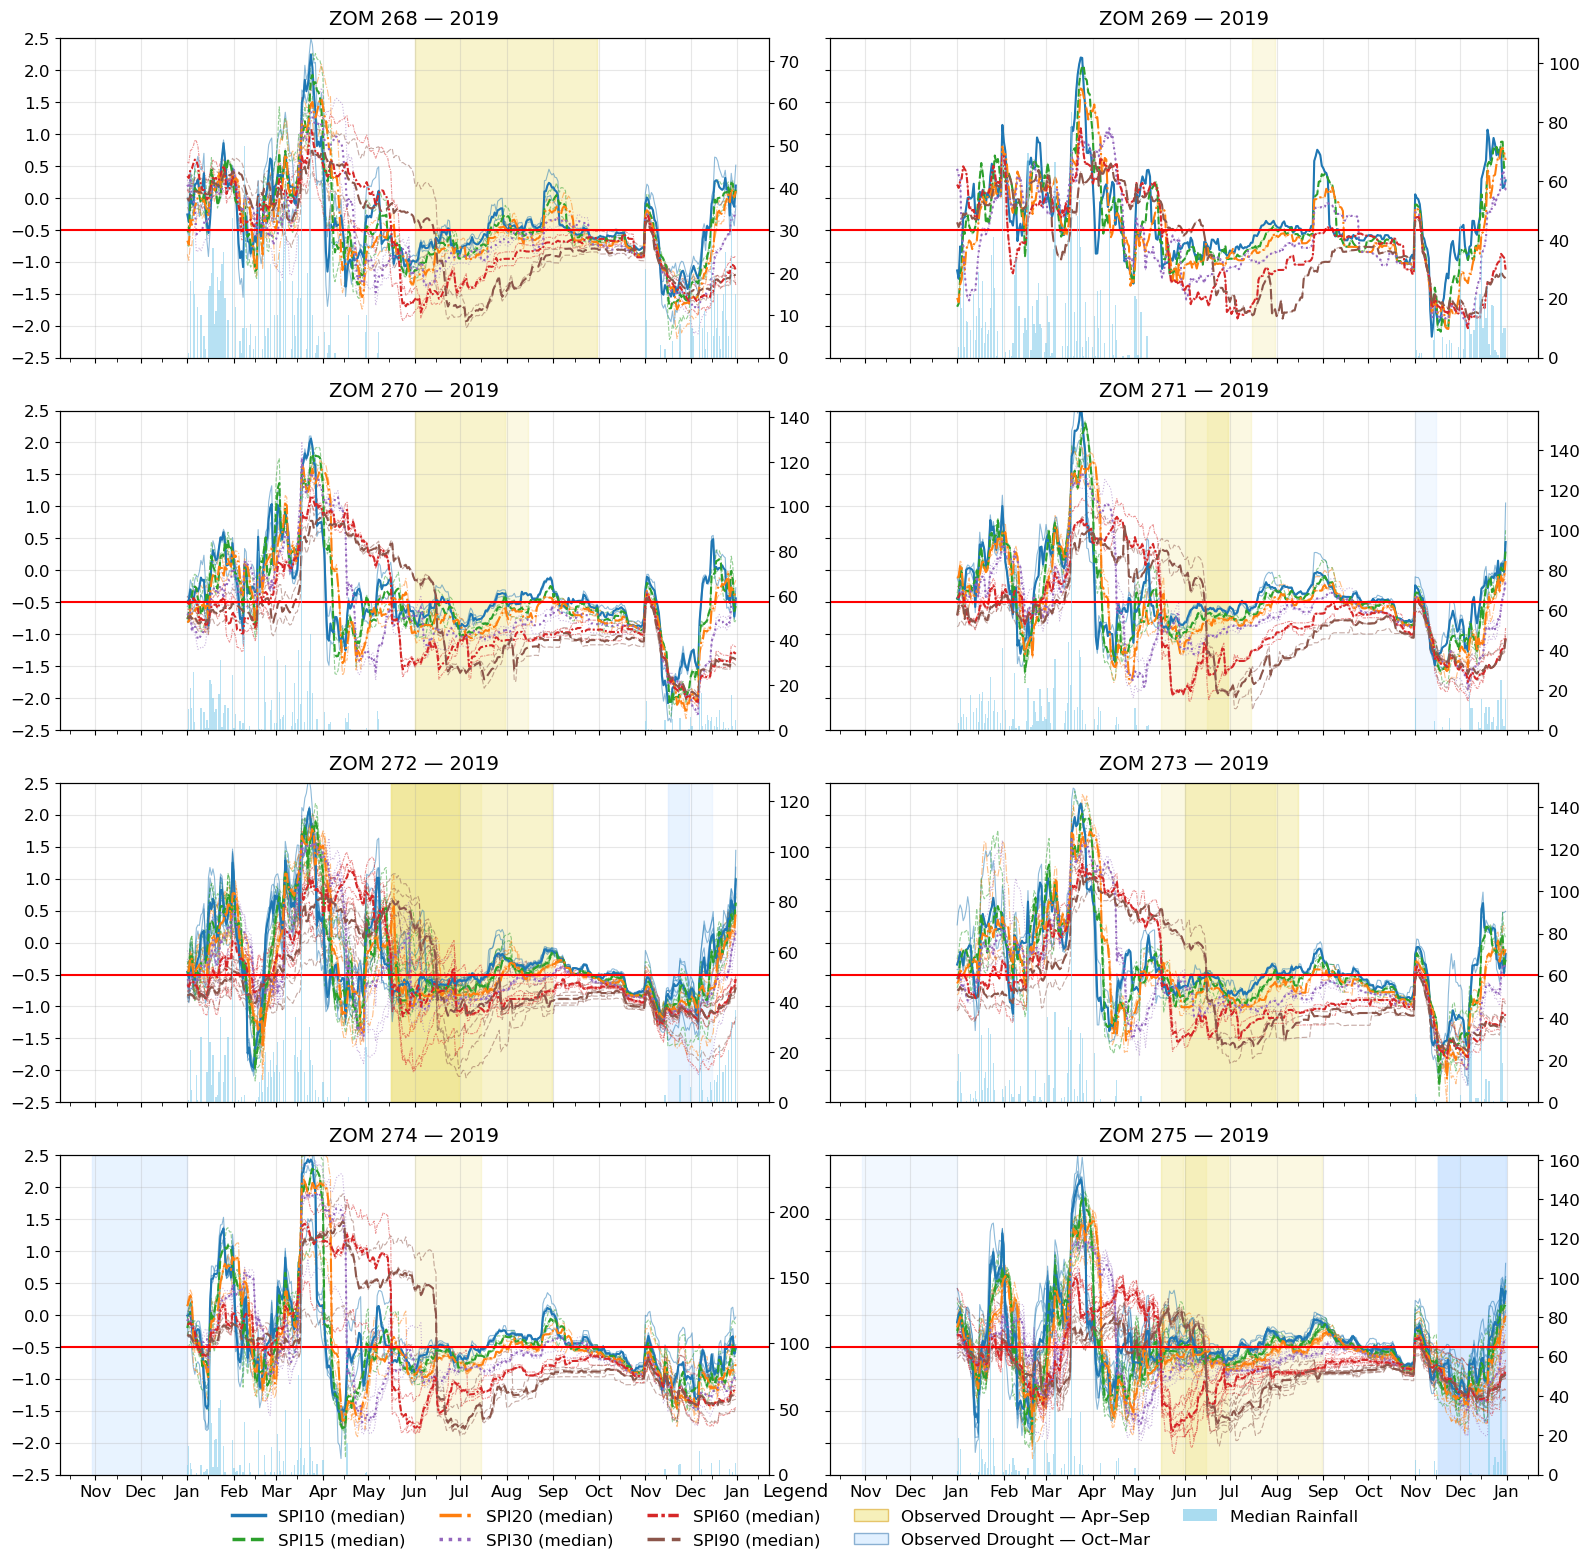

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# Fixed color per scale
spi_color_map = {
    10: "#1f77b4",  # blue
    15: "#2ca02c",  # green
    20: "#ff7f0e",  # orange
    30: "#9467bd",  # purple
    60: "#d62728",  # red
    90: "#8c564b",  # brown
}

# Fixed linestyle per scale
spi_linestyle_map = {
    10: "-",
    15: "--",
    20: "-.",
    30: ":",
    60: (0,(3,1,1,1)),   # custom dash
    90: (0,(5,2)),       # another custom dash
}

# Half-month label
def halfmonth_label(dt):
    if pd.isna(dt):
        return None
    return f"{calendar.month_abbr[dt.month]} {'I' if dt.day <= 15 else 'II'}"

# Assign season based on month
def assign_season(dt):
    m = dt.month
    return "Apr-Sep" if 4 <= m <= 9 else "Oct-Mar"

# Load data
# Load shapefile to get list of subdistricts in rainfed rice ZOM
shp_sawah = gpd.read_file("data/shp/sawah_tadah_hujan_kecamatan.shp")
sawah_kec_list = (
    shp_sawah['WADMKC']
    .str.strip()
    .str.lower()
    .unique()
    .tolist()
)

# Load drought samples
droughtsamples = pd.read_excel("data/dataset_kekeringan_2018-2024.xlsx")
droughtsamples["period_start"] = pd.to_datetime(droughtsamples["period_start"])
droughtsamples["period_end"]   = pd.to_datetime(droughtsamples["period_end"])
droughtsamples["season"]       = droughtsamples["period_start"].apply(assign_season)

# Filter drought samples to only those in rainfed rice ZOM subdistricts
droughtsamples["kecamatan_norm"] = droughtsamples["kecamatan"].str.strip().str.lower()
droughtsamples = droughtsamples[
    droughtsamples["kecamatan_norm"].isin(sawah_kec_list)
].copy()

# Filter ZOM groups only for kecamatan with sawah
zom_groups = {}

for zom, kec_list in droughtsamples.groupby("zom")["kecamatan_norm"]:
    filtered = [k for k in kec_list.unique().tolist() if k in sawah_kec_list]
    if len(filtered) > 0:
        zom_groups[zom] = filtered

# Collect drought events a ZOM experiences in a given year
def get_drought_events_for_zom_year(drought_samples, zom_id, year):

    ds = drought_samples[drought_samples["zom"] == zom_id].copy()

    # Apr–Sep season within the same year
    aprsep = ds[
        (ds["period_start"] >= f"{year}-04-01") &
        (ds["period_start"] <= f"{year}-09-30")
    ].copy()

    # Oct–Mar season that spills into this year (year-1 → year)
    oktmar_prev = ds[
        (ds["period_start"] >= f"{year-1}-10-01") &
        (ds["period_start"] <= f"{year}-03-31")
    ].copy()

    # Oct–Mar season starting this year (year → year+1)
    oktmar_next = ds[
        (ds["period_start"] >= f"{year}-10-01") &
        (ds["period_start"] <= f"{year+1}-03-31")
    ].copy()

    return pd.concat([aprsep, oktmar_prev, oktmar_next], ignore_index=True)


# Main Plot Function
def plot_spi_zom_year(zom_id, year, spi_dict, drought_samples, kecamatan_zom, metadata, data_daily):

    kec_list = kecamatan_zom[zom_id]

    # Year range
    start_year = pd.Timestamp(f"{year}-01-01")
    end_year   = pd.Timestamp(f"{year}-12-31")

    spi_scales = sorted(spi_dict.keys())

    fig, ax = plt.subplots(figsize=(14,6))

    # Plot each kecamatan (thin lines)
    for c in kec_list:
        for scale in spi_scales:
            if c not in spi_dict[scale]:
                continue

            ser = spi_dict[scale][c].loc[start_year:end_year]

            ax.plot(
                ser.index,
                ser.values,
                color=spi_color_map.get(scale, "black"),
                linestyle=spi_linestyle_map.get(scale, "-"),
                lw=0.8,
                alpha=0.5
            )

    # Add Median Line per SPI scale
    for scale in spi_scales:

        # Collect all kecamatan SPI series into a matrix
        spi_matrix = []
        for c in kec_list:
            if c in spi_dict[scale]:
                ser = spi_dict[scale][c].loc[start_year:end_year]
                spi_matrix.append(ser.values)

        if len(spi_matrix) == 0:
            continue

        # Calculate median across kecamatan (axis=0)
        spi_matrix = np.vstack(spi_matrix)
        median_spi = np.nanmedian(spi_matrix, axis=0)

        # Plot median line
        ax.plot(
            ser.index,  # All series have the same index
            median_spi,
            color=spi_color_map.get(scale, "black"),
            linestyle=spi_linestyle_map.get(scale, "-"),
            lw=1.5,
            label=f"SPI{scale} (median)"
        )

    # Overlay drought events + track which seasons appear
    events = get_drought_events_for_zom_year(drought_samples, zom_id, year)

    season_present = {"Apr-Sep": False, "Oct-Mar": False}

    for _, row in events.iterrows():

        shade_color = "khaki" if row["season"] == "Apr-Sep" else "#CEE6FF"
        shade_start = max(row["period_start"], start_year)
        shade_end   = min(row["period_end"], end_year)

        ax.axvspan(shade_start, shade_end, color=shade_color, alpha=0.25)

        ax.axvline(shade_start, color="gray", lw=0.7, alpha=0.5)
        ax.axvline(shade_end,   color="gray", lw=0.7, alpha=0.5)

        season_present[row["season"]] = True

        onset_label = halfmonth_label(row["period_start"])
        ax.text(
            shade_start, -2.45, onset_label,
            rotation=90, fontsize=12,
            va="bottom", ha="right", color="dimgray"
        )

    print(f"ZOM {zom_id}, Tahun {year} → {len(events)} kejadian ditemukan")

    # Get all rainfall stations belonging to the ZOM
    pos_in_zom = metadata[metadata["ZOM"] == zom_id].index.tolist()

    if len(pos_in_zom) > 0:
        # Extract rainfall data for the year and stations of this ZOM
        rain_subset = data_daily[pos_in_zom].loc[start_year:end_year]

        # Compute median rainfall across stations
        median_rain = rain_subset.median(axis=1)

        # Create second y-axis for rainfall
        ax2 = ax.twinx()
        ax2.bar(
            median_rain.index,
            median_rain.values,
            color="skyblue",
            linewidth=1.4,
            alpha=0.7,
            label="Median Rainfall"
        )
        ax2.set_ylabel("Rainfall Median (mm)", fontsize=13)
        ax2.tick_params(axis='y', labelsize=12)

    # Add Threshold SPI -0.5
    ax.axhline(-0.5, color="red", lw=1.5)

    # Formatting
    import matplotlib.dates as mdates

    # Format x-axis as months
    ax.xaxis.set_major_locator(mdates.MonthLocator())       # Tick every month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Label as Jan, Feb, etc.
    # Minor ticks at mid-month (day 15)
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
    # Optional: style minor ticks
    ax.tick_params(axis='x', which='minor', length=4, color='gray')

    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

    # ax.set_title(f"ZOM {zom_id} – Daily SPI (All Scales) – {year}", fontsize=15)
    ax.set_ylabel("SPI", fontsize=14)
    ax.set_ylim(-2.5, 2.5)
    ax.set_yticks(np.arange(-2.5, 3, 0.5))
    ax.grid(alpha=0.3)
    ax.set_xlabel("Month", fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.text(
        0.5, 0.95,
        f"ZOM {zom_id} – {year}",
        transform=ax.transAxes,
        ha="center",
        va="top",
        fontsize=14,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=4)
    )

    # Display kecamatan list below the title
    kec_display = ", ".join([k.title() for k in kec_list])
    import textwrap
    wrapped_kec = "\n".join(textwrap.wrap(kec_display, width=60))

    ax.text(
        0.5, 0.88,
        f"Rainfed Rice Subdistricts in ZOM: {wrapped_kec}",
        transform=ax.transAxes,
        ha="center",
        va="top",
        fontsize=12,
        color="black",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=4)
    )

    # Get drought-affected subdistricts in this year
    drought_kec = (
        events["kecamatan_norm"]
        .dropna()
        .unique()
        .tolist()
    )

    # Compute total cumulative drought area (ha)
    if len(drought_kec) > 0:
        # Filter only affected kecamatan & within this ZOM-year dataset
        total_luas = (
            events[events["kecamatan_norm"].isin(drought_kec)]["luas_kumulatif"]
            .sum()
        )

        drought_kec_display = ", ".join([k.title() for k in drought_kec])
        drought_info = (
            f"Drought-Affected Subdistricts: {drought_kec_display} "
            f"(Total drought area: {total_luas:.1f} ha)"
        )
    else:
        drought_info = "Drought-Affected Subdistricts: None"
    
    # Display combined info
    ax.text(
        0.5, 0.78,
        drought_info,
        transform=ax.transAxes,
        ha="center",
        va="top",
        fontsize=12,
        color="firebrick",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=4)
    )


    # Build Legend
    from matplotlib.lines import Line2D
    legend_elements = []

    # SPI scale legend
    for scale in spi_scales:
        legend_elements.append(
            Line2D(
                [0], [0],
                color=spi_color_map[scale],
                linestyle=spi_linestyle_map[scale],
                linewidth=2.5,
                label=f"SPI{scale} (median)"
            )
        )

    # Seasonal drought shading (only if present)
    if season_present["Apr-Sep"]:
        legend_elements.append(
            Patch(facecolor="khaki", alpha=0.7, edgecolor="goldenrod",
                  label="Observed Drought — Apr–Sep")
        )

    if season_present["Oct-Mar"]:
        legend_elements.append(
            Patch(facecolor="#CEE6FF", alpha=0.7, edgecolor="steelblue",
                  label="Observed Drought — Oct–Mar")
        )
    # Rainfall legend (if applicable)
    ax2.legend(["Precipitation"], loc="upper right", fontsize=10, frameon=True)

    ax.legend(
        handles=legend_elements,
        loc="lower center",
        ncol=4,
        bbox_to_anchor=(0.5, -0.35),
        frameon=False,
        fontsize=12,
        title="Legend",
        title_fontsize=11
    )

    plt.tight_layout()
    plt.show()

# Modified Plot Function for Single Panel (no legend)
def plot_spi_zom_year_singlepanel(zom_id, year, spi_dict, drought_samples, kecamatan_zom, metadata, data_daily, ax):

    kec_list = kecamatan_zom[zom_id]

    start_year = pd.Timestamp(f"{year}-01-01")
    end_year   = pd.Timestamp(f"{year}-12-31")

    spi_scales = sorted(spi_dict.keys())

    # Plot SPI Thin Lines 
    for c in kec_list:
        for scale in spi_scales:
            if c not in spi_dict[scale]:
                continue
            ser = spi_dict[scale][c].loc[start_year:end_year]
            ax.plot(
                ser.index,
                ser.values,
                color=spi_color_map.get(scale, "black"),
                linestyle=spi_linestyle_map.get(scale, "-"),
                lw=0.8,
                alpha=0.5
            )

    # Plot Median SPI
    for scale in spi_scales:
        spi_matrix = []
        for c in kec_list:
            if c in spi_dict[scale]:
                ser = spi_dict[scale][c].loc[start_year:end_year]
                spi_matrix.append(ser.values)

        if len(spi_matrix) == 0:
            continue

        spi_matrix = np.vstack(spi_matrix)
        median_spi = np.nanmedian(spi_matrix, axis=0)

        ax.plot(
            ser.index,
            median_spi,
            color=spi_color_map[scale],
            linestyle=spi_linestyle_map[scale],
            lw=1.5
        )

    # Overlay Drought Events
    events = get_drought_events_for_zom_year(drought_samples, zom_id, year)

    for _, row in events.iterrows():
        shade_color = "khaki" if row["season"] == "Apr-Sep" else "#CEE6FF"
        shade_start = max(row["period_start"], start_year)
        shade_end   = min(row["period_end"], end_year)

        ax.axvspan(shade_start, shade_end, color=shade_color, alpha=0.25)

    # Median Rainfall
    pos_in_zom = metadata[metadata["ZOM"] == zom_id].index.tolist()

    if len(pos_in_zom) > 0:
        rain_subset = data_daily[pos_in_zom].loc[start_year:end_year]
        median_rain = rain_subset.median(axis=1)

        ax2 = ax.twinx()
        ax2.bar(
            median_rain.index,
            median_rain.values,
            color="skyblue",
            alpha=0.6
        )
        ax2.set_ylim(0, median_rain.max() * 1.3)
        ax2.tick_params(axis='y', labelsize=12)

    # Axis formatting
    import matplotlib.dates as mdates
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
    ax.tick_params(axis='x', which='minor', length=3)
    ax.tick_params(axis='both', labelsize=12)
    # Add Threshold SPI -0.5
    ax.axhline(-0.5, color="red", lw=1.5)
    ax.set_ylim(-2.5, 2.5)
    ax.set_yticks(np.arange(-2.5, 3, 0.5))
    ax.grid(alpha=0.3)

# Plot 2x4 panel
def plot_spi_multizom_2019(zom_list, year, spi_dict, drought_samples, kecamatan_zom, metadata, data_daily):

    fig, axes = plt.subplots(
        nrows=4, ncols=2,
        figsize=(16, 16),
        sharex=True, sharey=True
    )

    axes = axes.flatten()

    # Loop ZOM
    for i, zom_id in enumerate(zom_list):
        ax = axes[i]

        # Call the main plotting function BUT modify it
        # so it draws on an existing axis and WITHOUT legend
        plot_spi_zom_year_singlepanel(
            zom_id,
            year,
            spi_dict,
            drought_samples,
            kecamatan_zom,
            metadata,
            data_daily,
            ax=ax
        )

        ax.set_title(f"ZOM {zom_id} — {year}", fontsize=14, pad=10)

    # Remove empty panels (if any)
    for j in range(len(zom_list), len(axes)):
        axes[j].axis("off")

    # CREATE ONE GLOBAL LEGEND

    spi_scales = sorted(spi_dict.keys())
    legend_elements = []

    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    # SPI scale style
    for scale in spi_scales:
        legend_elements.append(
            Line2D([0], [0],
                   color=spi_color_map[scale],
                   linestyle=spi_linestyle_map[scale],
                   linewidth=2.5,
                   label=f"SPI{scale} (median)")
        )

    # Shading legends
    legend_elements.append(
        Patch(facecolor="khaki", alpha=0.6, edgecolor="goldenrod",
              label="Observed Drought — Apr–Sep")
    )
    legend_elements.append(
        Patch(facecolor="#CEE6FF", alpha=0.6, edgecolor="steelblue",
              label="Observed Drought — Oct–Mar")
    )

    # Rainfall legend
    legend_elements.append(
        Patch(facecolor="skyblue", alpha=0.7, label="Median Rainfall")
    )

    fig.legend(
        handles=legend_elements,
        loc="lower center",
        ncol=5,
        fontsize=12,
        frameon=False,
        title="Legend",
        title_fontsize=13,
        bbox_to_anchor=(0.5, 0.02)
    )

    plt.tight_layout(rect=(0, 0.05, 1, 1))
    plt.show()


# Prepare kecamatan groups per ZOM
zom_groups = droughtsamples.groupby("zom")["kecamatan"].unique().to_dict()

plot_spi_multizom_2019(
    zom_list=[268, 269, 270, 271, 272, 273, 274, 275],
    year=2019,
    spi_dict=spi_dict,
    drought_samples=droughtsamples,
    kecamatan_zom=zom_groups,
    metadata=metadata,
    data_daily=data_daily
)


In [15]:
import pandas as pd
import numpy as np
import geopandas as gpd

# Load rainfed rice field polygons and normalize district names
sawah = gpd.read_file("data/shp/sawah_tadah_hujan_kecamatan.shp").to_crs(epsg=32749)
sawah["kecamatan_norm"] = sawah["WADMKC"].str.lower().str.strip()

# Normalize names in drought_samples
drought_samples["kecamatan_norm"] = drought_samples["kecamatan"].str.lower().str.strip()

# Normalize SPI-10 DataFrame
spi10 = spi_dict[10].copy()
spi10.index = pd.to_datetime(spi10.index)
spi10.columns = spi10.columns.str.lower().str.strip()

# Filter drought samples for districts with rainfed fields
kecamatan_sawah = sawah["kecamatan_norm"].unique()
drought_filtered = drought_samples[drought_samples["kecamatan_norm"].isin(kecamatan_sawah)].copy()

print(f"Districts with rainfed rice fields: {len(kecamatan_sawah)}")
print(f"Filtered drought sample rows: {len(drought_filtered)}")

# Function to compute mean SPI-10 for each drought event
def compute_mean_spi10(row):
    kec = row["kecamatan_norm"]
    start = pd.to_datetime(row["period_start"])
    end = pd.to_datetime(row["period_end"])

    # Skip if kecamatan not in SPI columns
    if kec not in spi10.columns:
        return np.nan

    spi_slice = spi10.loc[start:end, kec]

    if spi_slice.empty:
        return np.nan

    return spi_slice.mean()

# Compute mean SPI10
drought_filtered["mean_spi10"] = drought_filtered.apply(compute_mean_spi10, axis=1)
drought_filtered = drought_filtered.drop(columns=["kecamatan_norm"])


print("\nPreview with mean SPI-10:")
display(drought_filtered)
# drought_filtered.to_excel("data/dspi/drought_samples_with_mean_spi10.xlsx", index=False)

selected_events = []

for season in ["April-September", "Oktober-Maret"]:
    
    df_season = drought_filtered[drought_filtered["musim_tanam"] == season].copy()
    if df_season.empty:
        continue

    # Largest impacted area
    impact_case = df_season.sort_values("luas_kumulatif", ascending=False).iloc[0]

    # Most severe drought (lowest SPI10)
    severity_case = df_season.sort_values("mean_spi10", ascending=True).iloc[0]

    # Final selection: choose severity_case
    final_case = severity_case

    selected_events.append(final_case)

selected_events = pd.DataFrame(selected_events)
print("\nSelected typical drought cases for rainfed rice fields:")
selected_events.to_excel("data/dspi/kasus_kekeringan_khas.xlsx", index=False)
display(selected_events)




Districts with rainfed rice fields: 41
Filtered drought sample rows: 86

Preview with mean SPI-10:


id   kecamatan         kabupaten period_start period_end  \
0      1     Ponjong  Kab. Gunungkidul   2018-05-16 2018-06-15   
1      2     Rongkop  Kab. Gunungkidul   2018-05-16 2018-06-15   
2      3      Playen  Kab. Gunungkidul   2018-05-16 2018-06-15   
3      4    Wonosari  Kab. Gunungkidul   2018-05-16 2018-06-15   
4      5  Karangmojo  Kab. Gunungkidul   2018-05-16 2018-06-15   
..   ...         ...               ...          ...        ...   
104  105      Semanu  Kab. Gunungkidul   2024-06-16 2024-06-30   
105  106   Saptosari  Kab. Gunungkidul   2024-06-16 2024-06-30   
106  107      Playen  Kab. Gunungkidul   2024-06-07 2024-06-30   
107  108  Karangmojo  Kab. Gunungkidul   2024-06-21 2024-08-31   
108  109      Dlingo       Kab. Bantul   2024-07-10 2024-08-15   

     luas_kumulatif      musim_tanam  zom  mean_spi10  
0              17.0  April-September  274   -0.499968  
1               8.0  April-September  271   -0.550097  
2              15.0  April-September  271   -0.411484  
3              38.0  April-September  271   -0.508290  
4              12.0  April-September  271   -0.468226  
..              ...              ...  ...         ...  
104            70.0  April-September  273   -0.363933  
105             3.0  April-September  273   -0.284733  
106             9.0  April-September  272   -0.335875  
107           162.0  April-September  272   -0.076125  
108            60.0  April-September  272   -0.220108  

[86 rows x 9 columns]


Selected typical drought cases for rainfed rice fields:


id    kecamatan         kabupaten period_start period_end  luas_kumulatif  \
32  33       Ngawen  Kab. Gunungkidul   2019-05-16 2019-06-30          1090.0   
61  62  Tanjungsari  Kab. Gunungkidul   2019-11-16 2019-11-30           800.0   

        musim_tanam  zom  mean_spi10  
32  April-September  270   -0.750652  
61    Oktober-Maret  271   -1.080000

/var/folders/9g/y4lb5z2j2jg8m_dmhp5c6bjh0000gn/T/ipykernel_5847/425705464.py:22: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom = sawah_df.loc[sawah_df["WADMKC"].str.lower() == kecamatan_name.lower(), "geometry"].unary_union


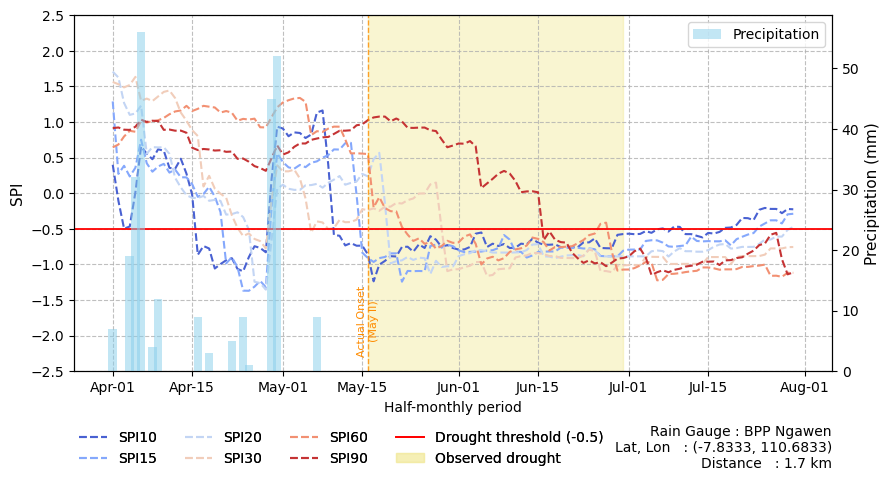

✅ Saved: data/img/typical_drought_Ngawen_2019_DOYannot.png
   • Kecamatan     : Ngawen
   • Pos hujan     : BPP Ngawen
   • Koordinat     : (-7.83333, 110.68333)
   • Jarak         : 1.7 km
   • SPI10 Onset   : 2019-04-16
   • SPI10 Offset  : 2019-04-29



/var/folders/9g/y4lb5z2j2jg8m_dmhp5c6bjh0000gn/T/ipykernel_5847/425705464.py:22: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom = sawah_df.loc[sawah_df["WADMKC"].str.lower() == kecamatan_name.lower(), "geometry"].unary_union


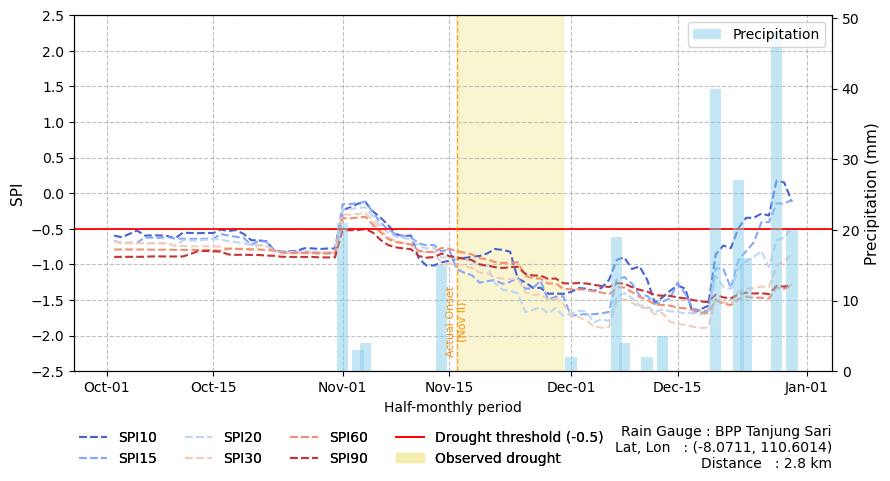

✅ Saved: data/img/typical_drought_Tanjungsari_2019_DOYannot.png
   • Kecamatan     : Tanjungsari
   • Pos hujan     : BPP Tanjung Sari
   • Koordinat     : (-8.07111, 110.60139)
   • Jarak         : 2.8 km
   • SPI10 Onset   : 2019-10-02
   • SPI10 Offset  : 2019-11-01



In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from matplotlib.dates import DateFormatter
from pyproj import Transformer

# Load selected cases
spi_scales = sorted(spi_dict.keys())
selected_cases = pd.read_excel("data/dspi/kasus_kekeringan_khas.xlsx")
# Load shapefile and drought-event table
sawah = gpd.read_file("data/shp/sawah_tadah_hujan_kecamatan.shp").to_crs(epsg=32749)
sawah["kecamatan_norm"] = sawah["WADMKC"].str.lower().str.strip()
drought_samples["kecamatan_norm"] = drought_samples["kecamatan"].str.lower().str.strip()

# Merge without strict validation (many-to-many is allowed)
sawah_join = sawah.merge(drought_samples, on="kecamatan_norm", how="inner")

# Nearest station lookup function
def nearest_station_from_kecamatan(kecamatan_name, sawah_df, metadata):
    geom = sawah_df.loc[sawah_df["WADMKC"].str.lower() == kecamatan_name.lower(), "geometry"].unary_union
    centroid_utm = geom.centroid

    transformer = Transformer.from_crs("EPSG:4326", "EPSG:32749", always_xy=True)
    meta = metadata.copy()
    meta["x_utm"], meta["y_utm"] = transformer.transform(meta["Bujur"].values, meta["Lintang"].values)

    station_points = meta.apply(lambda r: Point(r["x_utm"], r["y_utm"]), axis=1)
    dists = station_points.apply(lambda p: p.distance(centroid_utm))

    nearest_id = dists.idxmin()
    return nearest_id, dists.min() / 1000

# Convert DOY into half-month categorical labels (e.g., Mar I, Mar II)
def doy_to_halfmonth_label(date):
    if pd.isna(date):
        return np.nan
    month_name = calendar.month_abbr[date.month]
    half = "I" if date.day <= 15 else "II"
    return f"{month_name} {half}"

# Plotting function
def plot_typical_drought(case_row, sawah_join, metadata, data_daily, spi_dict, show_plot=True):
    start, end = pd.to_datetime(case_row["period_start"]), pd.to_datetime(case_row["period_end"])
    nearest_kec = case_row["kecamatan"]
    
    nearest_stid, dist_km = nearest_station_from_kecamatan(nearest_kec, sawah_join, metadata)
    station_name = metadata.loc[nearest_stid, "Nama Stasiun"]

    # Add station info
    station_lat = metadata.loc[nearest_stid, "Lintang"]
    station_lon = metadata.loc[nearest_stid, "Bujur"]

    kabupaten = sawah_join.loc[sawah_join["WADMKC"].str.lower() == nearest_kec.lower(), "kabupaten"].iloc[0]
    year = start.year

    if nearest_kec not in spi_dict[spi_scales[0]].columns:
        print(f"⚠️ Kecamatan {nearest_kec} tidak ditemukan di SPI, dilewati.")
        return

    # Extract SPI series
    spi_series_dict = {s: spi_dict[s][nearest_kec] for s in spi_scales}
    spi15 = spi_series_dict[10]
    rain_series = data_daily[nearest_stid]

    # Window ± days
    start_plot = start - pd.Timedelta(days=45)
    end_plot = end + pd.Timedelta(days=30)

    rain_clip = rain_series.loc[start_plot:end_plot]
    spi_clip = {s: spi_series_dict[s].loc[start_plot:end_plot] for s in spi_scales}
    spi15_clip = spi15.loc[start_plot:end_plot]

    # Find onset & offset SPI10
    onset_spi15 = spi15_clip[spi15_clip <= -0.5].index.min()
    offset_spi15 = spi15_clip[(spi15_clip.index > onset_spi15) & (spi15_clip > -0.5)].index.min() if onset_spi15 is not None else None

    # Plot
    fig, ax1 = plt.subplots(figsize=(9, 5))
    ax2 = ax1.twinx()
    colors = plt.cm.coolwarm(np.linspace(0.05, 0.95, len(spi_scales)))

    for color, scale in zip(colors, spi_scales):
        ax1.plot(spi_clip[scale].index, spi_clip[scale].values, linestyle='--', lw=1.5, color=color, label=f"SPI{scale}")

    ax1.axhline(-0.5, color='red', lw=1.3, label='Drought threshold (-0.5)')
    ax1.axvspan(start, end, color='khaki', alpha=0.4, label='Observed drought')
    ax2.bar(rain_clip.index, rain_clip.values, color='skyblue', width=1.5, alpha=0.5)

    # Vertical markers
    def add_vertical_marker(ax, date, label, color):
        if date is not None:
            doy = pd.to_datetime(case_row["period_start"], errors="coerce")
            doy_label = doy_to_halfmonth_label(doy)
            ax.axvline(date, color=color, lw=1.0, linestyle='--', alpha=0.8)
            ax.text(date, -2.3, f"{label}\n({doy_label})", color=color, fontsize=8,
                    rotation=90, va='bottom', ha='center')

    add_vertical_marker(ax1, start, "Actual Onset", "darkorange")

    # Labels
    ax1.set_ylabel("SPI", fontsize=11)
    ax2.set_ylabel("Precipitation (mm)", fontsize=11)
    ax1.set_ylim(-2.5, 2.5)
    ax1.set_yticks(np.arange(-2.5, 3, 0.5))
    ax1.xaxis.set_major_formatter(DateFormatter("%b-%d"))
    ax1.grid(True, linestyle='--', alpha=0.8)
    ax1.set_xlabel("Half-monthly period")

    # Legend
    legend1 = ax1.legend(title="", loc="lower left", fontsize=10, ncol=4,
                         bbox_to_anchor=(-0.01, -0.3), frameon=False)
    ax2.legend(["Precipitation"], loc="upper right", fontsize=10, frameon=True)
    fig.add_artist(legend1)

    # Add station info
    station_info = (
        f"Rain Gauge : {station_name}\n"
        f"Lat, Lon   : ({station_lat:.4f}, {station_lon:.4f})\n"
        f"Distance   : {dist_km:.1f} km"
    )
    ax1.text(1.0, -0.15, station_info, transform=ax1.transAxes,
             fontsize=10, ha="right", va="top")

    # Save
    fname = f"data/img/typical_drought_{nearest_kec}_{year}_DOYannot.png"
    plt.tight_layout()
    plt.savefig(fname, dpi=600, bbox_inches="tight")

    if show_plot:
        plt.show()
    else:
        plt.close()

    # Print summary
    print(f"✅ Saved: {fname}")
    print(f"   • Kecamatan     : {nearest_kec}")
    print(f"   • Pos hujan     : {station_name}")
    print(f"   • Koordinat     : ({station_lat}, {station_lon})")
    print(f"   • Jarak         : {dist_km:.1f} km")
    print(f"   • SPI10 Onset   : {onset_spi15.date() if onset_spi15 is not None else '-'}")
    print(f"   • SPI10 Offset  : {offset_spi15.date() if offset_spi15 is not None else '-'}\n")

# Plot all hybrid-selected cases
for _, case in selected_cases.iterrows():
    plot_typical_drought(case, sawah_join, metadata, data_daily, spi_dict, show_plot=True)


Filtered dataset contains 138 rows for year 2019 (AprSep)
Spatial Distribution of Drought Onset and DIF across SPI Time-Scales
Season: AprSep, Year: 2019


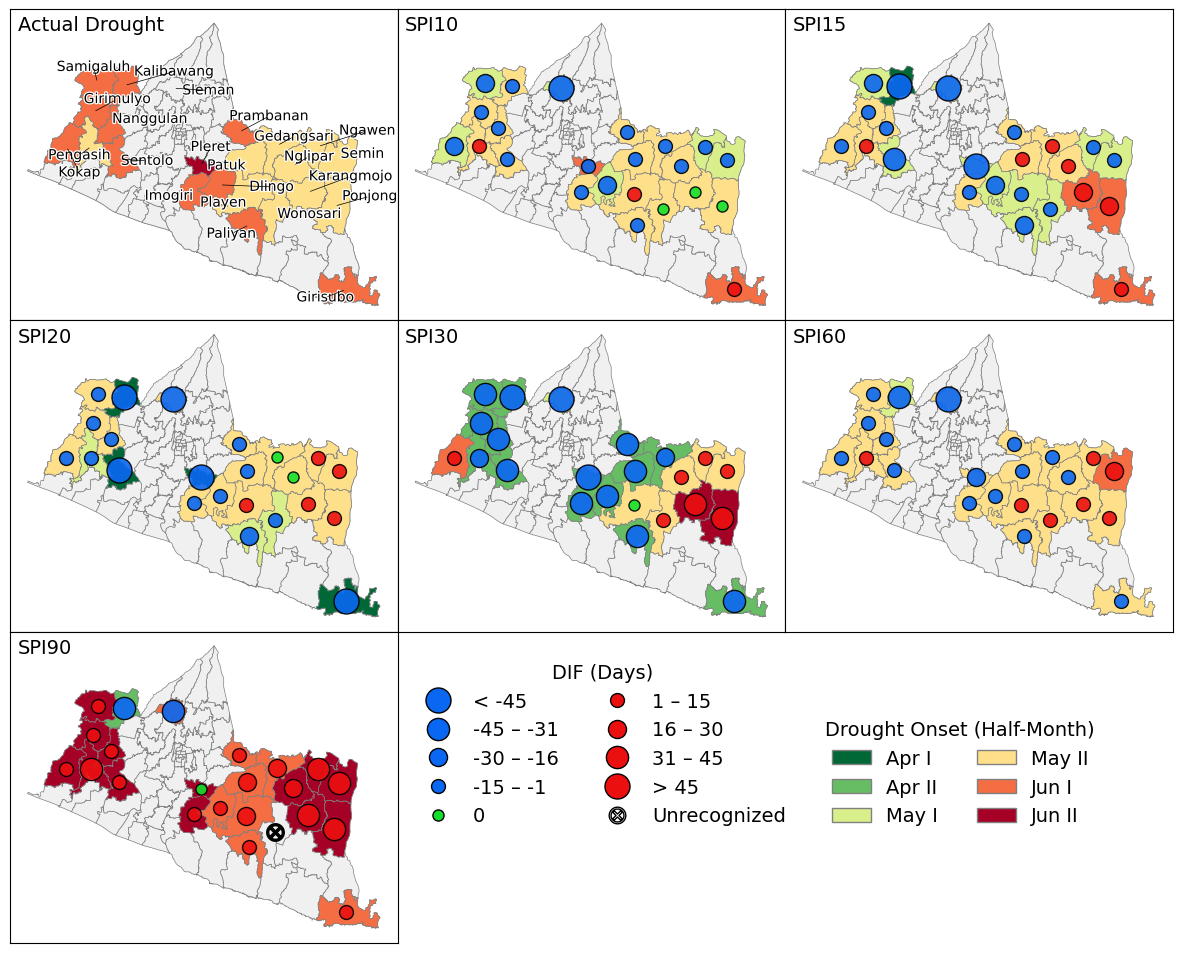

Map generation complete. DOY and DIF spatial layers successfully rendered for the entire study area.


In [97]:
# Spatial visualization of drought onset and DIF based on the methodological structure of Zhang et al. (2023),
# adapted for the Special Region of Yogyakarta (DIY) using kecamatan-level units and half-month DOY representation.

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import calendar

# Load drought identification table for the selected method, season, and year
season = "AprSep"
scales = [10, 15, 20, 30, 60, 90]
year = 2019

df = pd.read_excel(f"data/dspi/identifikasi_kekeringan_SPI_rainfed_{method}_{season}.xlsx")

# Load kecamatan boundaries and prepare join keys
shp = gpd.read_file("data/shp/kecamatan_diy.shp").to_crs(3857)
shp["join_name"] = shp["NAMOBJ"].str.lower().str.strip()
df["join_name"] = df["kecamatan"].str.lower().str.strip()

# Filter data for the selected year
df["onset_spi"] = pd.to_datetime(df["onset_spi"], errors="coerce")
df["period_start"] = pd.to_datetime(df["period_start"], errors="coerce")
df = df[df["period_start"].dt.year == year].copy()
print(f"Filtered dataset contains {len(df)} rows for year {year} ({season})")

# Compute DOY values and DIF statistics
df["DOY_spi"] = df["onset_spi"].dt.dayofyear
df["DOY_true"] = df["period_start"].dt.dayofyear
df["DIF"] = df["DOY_spi"] - df["DOY_true"]

# Convert DOY into half-month categorical labels (e.g., Mar I, Mar II)
def doy_to_halfmonth_label(date):
    if pd.isna(date):
        return np.nan
    month_name = calendar.month_abbr[date.month]
    half = "I" if date.day <= 15 else "II"
    return f"{month_name} {half}"

df["DOY_label"] = df["onset_spi"].apply(doy_to_halfmonth_label)

# Generate the half-month label list dynamically based on data availability
valid_dates = df["onset_spi"].dropna()
if len(valid_dates) > 0:
    months = pd.date_range(valid_dates.min().replace(day=1),
                           valid_dates.max().replace(day=28), freq="MS")
    doy_labels = [f"{calendar.month_abbr[m.month]} {h}"
                   for m in months for h in ["I", "II"]]
else:
    doy_labels = []

# Create a continuous green-to-red color mapping for DOY categories
doy_colors = plt.cm.RdYlGn_r(np.linspace(0, 1, len(doy_labels)))
doy_color_map = dict(zip(doy_labels, doy_colors))
default_color = "#f0f0f0"

# Classify DIF into simplified categories
def classify_dif_simple(v):
    if pd.isna(v):
        return "Unrecognized"
    elif v < 0:
        return "Early"
    elif v == 0:
        return "On-time"
    elif v > 0:
        return "Late"

df["DIF_simple"] = df["DIF"].apply(classify_dif_simple)

# Define marker size scaling for DIF classes
def dif_size(v):
    if pd.isna(v):
        return 8
    if v <= -46 or v >= 46:
        return 18
    elif -45 <= v <= -31 or 31 <= v <= 45:
        return 16
    elif -30 <= v <= -16 or 16 <= v <= 30:
        return 13
    elif -15 <= v <= -1 or 1 <= v <= 15:
        return 10
    elif v == 0:
        return 8

# Fixed color assignment for DIF categories
DIF_colors = {
    "Early": "#0a67f2",
    "On-time": "#13e02b",
    "Late": "#ec0f0f",
    "Unrecognized": "black"
}

# Legend reference entries for DIF magnitude classes
legend_dif_classes = [
    {"label": "< -45",    "color": DIF_colors["Early"], "size": 18},
    {"label": "-45 – -31","color": DIF_colors["Early"], "size": 16},
    {"label": "-30 – -16","color": DIF_colors["Early"], "size": 13},
    {"label": "-15 – -1", "color": DIF_colors["Early"], "size": 10},
    {"label": "0",        "color": DIF_colors["On-time"], "size": 8},
    {"label": "1 – 15",   "color": DIF_colors["Late"],  "size": 10},
    {"label": "16 – 30",  "color": DIF_colors["Late"],  "size": 13},
    {"label": "31 – 45",  "color": DIF_colors["Late"],  "size": 16},
    {"label": "> 45",     "color": DIF_colors["Late"],  "size": 18},
]

# Spatial join of drought metrics to the boundary layer
shp_merged = shp.merge(df, on="join_name", how="left")
shp_merged["centroid"] = shp_merged.geometry.centroid

# Prepare drought_samples for identifying actual drought areas and unrecognized detections
drought_samples["kecamatan_norm"] = drought_samples["kecamatan"].str.lower().str.strip()
drought_samples["musim_tanam_norm"] = (
    drought_samples["musim_tanam"].str.lower().str.replace("-", "").str.replace(" ", "")
)

if season == "AprSep":
    musim_filter = drought_samples["musim_tanam_norm"].str.contains("aprilseptember")
elif season == "OctMar":
    musim_filter = (
        drought_samples["musim_tanam_norm"].str.contains("oktobermaret") |
        drought_samples["musim_tanam_norm"].str.contains("octobermarch")
    )
else:
    musim_filter = True

rainfed_kec = set(df["join_name"].unique())

# Filter drought occurrences for the analysis year and season
drought_ssn = drought_samples[
    (pd.to_datetime(drought_samples["period_start"]).dt.year == year) &
    musim_filter &
    (drought_samples["kecamatan_norm"].isin(rainfed_kec))
].copy()

actual_drought_kec = set(drought_ssn["kecamatan_norm"].unique())

# Attach actual onset labels to the spatial layer
drought_ssn["actual_onset"] = pd.to_datetime(drought_ssn["period_start"])
drought_ssn["actual_label"] = drought_ssn["actual_onset"].apply(doy_to_halfmonth_label)

shp_actual = shp.merge(
    drought_ssn[["kecamatan_norm", "actual_label"]],
    left_on="join_name",
    right_on="kecamatan_norm",
    how="left"
)
shp_actual["centroid"] = shp_actual.geometry.centroid

# Create a multi-panel figure for the actual onset map and the six SPI time-scale maps
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
plt.subplots_adjust(bottom=0.35, top=0.817, hspace=0.0, wspace=0.0)
for ax in axes.flat:
    ax.set_aspect('auto')

# Disable unused panels
axes[2, 1].axis("off")
axes[2, 2].axis("off")

# Panel for actual drought onset
ax = axes[0, 0]
shp.plot(ax=ax, color=default_color, edgecolor="gray", linewidth=0.5)
shp_actual["color_doy_actual"] = shp_actual["actual_label"].map(doy_color_map).fillna(default_color)
shp_actual.plot(color=shp_actual["color_doy_actual"], edgecolor="gray", linewidth=0.5, ax=ax)

# Add labels for actual drought kecamatan
import matplotlib.patheffects as path_effects
from adjustText import adjust_text

texts = []
for _, row in shp_actual.iterrows():
    if pd.notna(row["actual_label"]):
        c = row["centroid"]
        kec_label = row["join_name"].title()

        txt = ax.text(
            c.x, c.y,
            kec_label,
            fontsize=10,
            ha="center",
            va="center",
            color="black",
            # bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=1)
        )
        txt.set_path_effects([
            path_effects.Stroke(linewidth=1.8, foreground='white'),
            path_effects.Normal()
        ]) 
        texts.append(txt)

# Adjust labels automatically to avoid overlap
adjust_text(
    texts,
    ax=ax,
    expand_points=(1.2, 1.4),
    expand_text=(1.2, 1.4),
    arrowprops=dict(arrowstyle="-", color='black', lw=0.5)
)

ax.text(0.02, 0.98, "Actual Drought", transform=ax.transAxes, fontsize=14, va="top", ha="left")
ax.set_xticks([]); ax.set_yticks([])

# Panels for SPI10 to SPI90
pane_index = 1
for scale in scales:
    ax = axes[pane_index // 3, pane_index % 3]
    pane_index += 1

    data_scale = shp_merged[shp_merged["scale"] == scale].copy()

    shp.plot(ax=ax, color=default_color, edgecolor="gray", linewidth=0.5)

    if data_scale.empty:
        ax.text(0.5, 0.5, f"No data (SPI{scale})",
                ha="center", va="center", fontsize=12)
        ax.axis("off")
        continue

    data_scale["color_doy"] = data_scale["DOY_label"].map(doy_color_map).fillna(default_color)
    data_scale.plot(color=data_scale["color_doy"], edgecolor="gray", linewidth=0.5, ax=ax)

    for _, row in data_scale.iterrows():
        c = row["centroid"]
        kec = row["join_name"]

        if (kec in actual_drought_kec) and pd.isna(row["onset_spi"]):
            ax.scatter(c.x, c.y, marker=r'$\otimes$', s=160,
                       color='black', linewidths=1, zorder=8)
            continue

        color = DIF_colors.get(row["DIF_simple"], "black")
        ms = dif_size(row["DIF"])
        ax.scatter(c.x, c.y, s=ms**2, color=color,
                   edgecolor="black", alpha=0.9)

    ax.text(0.02, 0.98, f"SPI{scale}", transform=ax.transAxes,
            fontsize=14, va="top", ha="left")
    ax.set_xticks([]); ax.set_yticks([])

# Legend for DOY categories
legend_doy = [
    Patch(facecolor=doy_color_map[lbl], edgecolor='gray', label=lbl)
    for lbl in doy_labels
]
fig.legend(
    handles=legend_doy,
    title="Drought Onset (Half-Month)",
    loc='lower right',
    bbox_to_anchor=(0.86, 0.4),
    ncol=min(2, len(legend_doy)),
    fontsize=14,
    title_fontsize=14,
    frameon=False
)

# Legend for DIF categories
handles_dif = [
    Line2D([0], [0], marker='o', color='w',
        label=item["label"],
        markerfacecolor=item["color"],
        markeredgecolor='black',
        markersize=item["size"])
    for item in legend_dif_classes
]

handles_dif.append(
    Line2D([0], [0], color='none', marker=r'$\otimes$',
           label='Unrecognized', markersize=12,
           markeredgecolor='black')
)

fig.legend(
    handles=handles_dif,
    title="DIF (Days)",
    loc='lower center',
    bbox_to_anchor=(0.52, 0.4),
    ncol=2,
    fontsize=14,
    title_fontsize=14,
    frameon=False
)

# fig.suptitle(
#     f"Spatial Distribution of Drought Onset and DIF across SPI Time-Scales\nSeason: {season}, Year: {year}",
#     fontsize=15, y=0.85
# )
print(f"Spatial Distribution of Drought Onset and DIF across SPI Time-Scales\nSeason: {season}, Year: {year}")
plt.show()

print("Map generation complete. DOY and DIF spatial layers successfully rendered for the entire study area.")


Filtered dataset contains 72 rows for year 2019 (OctMar)
Spatial Distribution of Drought Onset and DIF across SPI Time-Scales
Season: OctMar, Year: 2019


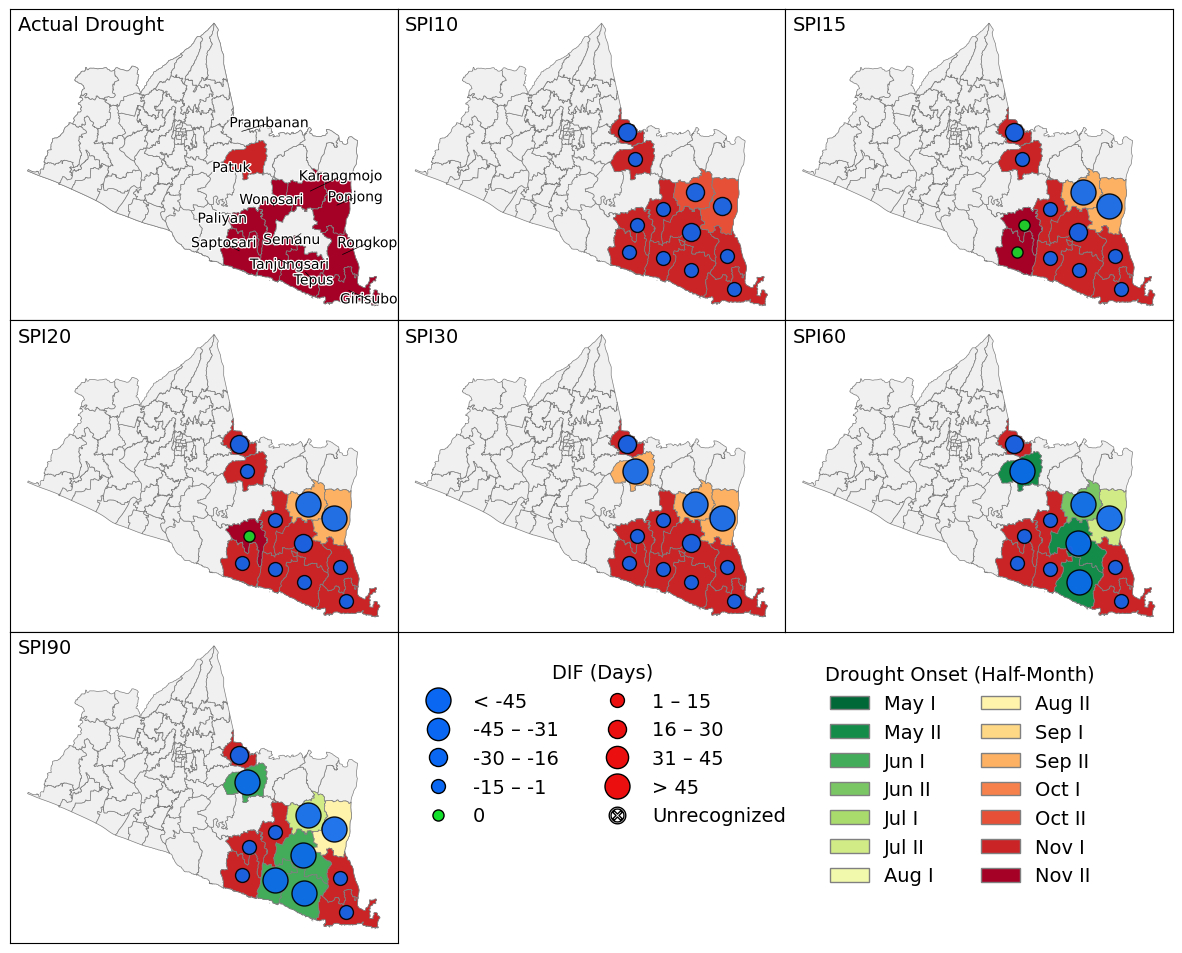

Map generation complete. DOY and DIF spatial layers successfully rendered for the entire study area.


In [98]:
# Spatial visualization of drought onset and DIF based on the methodological structure of Zhang et al. (2023),
# adapted for the Special Region of Yogyakarta (DIY) using kecamatan-level units and half-month DOY representation.

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import calendar

# Load drought identification table for the selected method, season, and year
season = "OctMar"
scales = [10, 15, 20, 30, 60, 90]
year = 2019

df = pd.read_excel(f"data/dspi/identifikasi_kekeringan_SPI_rainfed_{method}_{season}.xlsx")

# Load kecamatan boundaries and prepare join keys
shp = gpd.read_file("data/shp/kecamatan_diy.shp").to_crs(3857)
shp["join_name"] = shp["NAMOBJ"].str.lower().str.strip()
df["join_name"] = df["kecamatan"].str.lower().str.strip()

# Filter data for the selected year
df["onset_spi"] = pd.to_datetime(df["onset_spi"], errors="coerce")
df["period_start"] = pd.to_datetime(df["period_start"], errors="coerce")
df = df[df["period_start"].dt.year == year].copy()
print(f"Filtered dataset contains {len(df)} rows for year {year} ({season})")

# Compute DOY values and DIF statistics
df["DOY_spi"] = df["onset_spi"].dt.dayofyear
df["DOY_true"] = df["period_start"].dt.dayofyear
df["DIF"] = df["DOY_spi"] - df["DOY_true"]

# Convert DOY into half-month categorical labels (e.g., Mar I, Mar II)
def doy_to_halfmonth_label(date):
    if pd.isna(date):
        return np.nan
    month_name = calendar.month_abbr[date.month]
    half = "I" if date.day <= 15 else "II"
    return f"{month_name} {half}"

df["DOY_label"] = df["onset_spi"].apply(doy_to_halfmonth_label)

# Generate the half-month label list dynamically based on data availability
valid_dates = df["onset_spi"].dropna()
if len(valid_dates) > 0:
    months = pd.date_range(valid_dates.min().replace(day=1),
                           valid_dates.max().replace(day=28), freq="MS")
    doy_labels = [f"{calendar.month_abbr[m.month]} {h}"
                   for m in months for h in ["I", "II"]]
else:
    doy_labels = []

# Create a continuous green-to-red color mapping for DOY categories
doy_colors = plt.cm.RdYlGn_r(np.linspace(0, 1, len(doy_labels)))
doy_color_map = dict(zip(doy_labels, doy_colors))
default_color = "#f0f0f0"

# Classify DIF into simplified categories
def classify_dif_simple(v):
    if pd.isna(v):
        return "Unrecognized"
    elif v < 0:
        return "Early"
    elif v == 0:
        return "On-time"
    elif v > 0:
        return "Late"

df["DIF_simple"] = df["DIF"].apply(classify_dif_simple)

# Define marker size scaling for DIF classes
def dif_size(v):
    if pd.isna(v):
        return 8
    if v <= -46 or v >= 46:
        return 18
    elif -45 <= v <= -31 or 31 <= v <= 45:
        return 16
    elif -30 <= v <= -16 or 16 <= v <= 30:
        return 13
    elif -15 <= v <= -1 or 1 <= v <= 15:
        return 10
    elif v == 0:
        return 8

# Fixed color assignment for DIF categories
DIF_colors = {
    "Early": "#0a67f2",
    "On-time": "#13e02b",
    "Late": "#ec0f0f",
    "Unrecognized": "black"
}

# Legend reference entries for DIF magnitude classes
legend_dif_classes = [
    {"label": "< -45",    "color": DIF_colors["Early"], "size": 18},
    {"label": "-45 – -31","color": DIF_colors["Early"], "size": 16},
    {"label": "-30 – -16","color": DIF_colors["Early"], "size": 13},
    {"label": "-15 – -1", "color": DIF_colors["Early"], "size": 10},
    {"label": "0",        "color": DIF_colors["On-time"], "size": 8},
    {"label": "1 – 15",   "color": DIF_colors["Late"],  "size": 10},
    {"label": "16 – 30",  "color": DIF_colors["Late"],  "size": 13},
    {"label": "31 – 45",  "color": DIF_colors["Late"],  "size": 16},
    {"label": "> 45",     "color": DIF_colors["Late"],  "size": 18},
]

# Spatial join of drought metrics to the boundary layer
shp_merged = shp.merge(df, on="join_name", how="left")
shp_merged["centroid"] = shp_merged.geometry.centroid

# Prepare drought_samples for identifying actual drought areas and unrecognized detections
drought_samples["kecamatan_norm"] = drought_samples["kecamatan"].str.lower().str.strip()
drought_samples["musim_tanam_norm"] = (
    drought_samples["musim_tanam"].str.lower().str.replace("-", "").str.replace(" ", "")
)

if season == "AprSep":
    musim_filter = drought_samples["musim_tanam_norm"].str.contains("aprilseptember")
elif season == "OctMar":
    musim_filter = (
        drought_samples["musim_tanam_norm"].str.contains("oktobermaret") |
        drought_samples["musim_tanam_norm"].str.contains("octobermarch")
    )
else:
    musim_filter = True

rainfed_kec = set(df["join_name"].unique())

# Filter drought occurrences for the analysis year and season
drought_ssn = drought_samples[
    (pd.to_datetime(drought_samples["period_start"]).dt.year == year) &
    musim_filter &
    (drought_samples["kecamatan_norm"].isin(rainfed_kec))
].copy()

actual_drought_kec = set(drought_ssn["kecamatan_norm"].unique())

# Attach actual onset labels to the spatial layer
drought_ssn["actual_onset"] = pd.to_datetime(drought_ssn["period_start"])
drought_ssn["actual_label"] = drought_ssn["actual_onset"].apply(doy_to_halfmonth_label)

shp_actual = shp.merge(
    drought_ssn[["kecamatan_norm", "actual_label"]],
    left_on="join_name",
    right_on="kecamatan_norm",
    how="left"
)
shp_actual["centroid"] = shp_actual.geometry.centroid

# Create a multi-panel figure for the actual onset map and the six SPI time-scale maps
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
plt.subplots_adjust(bottom=0.35, top=0.817, hspace=0.0, wspace=0.0)
for ax in axes.flat:
    ax.set_aspect('auto')

# Disable unused panels
axes[2, 1].axis("off")
axes[2, 2].axis("off")

# Panel for actual drought onset
ax = axes[0, 0]
shp.plot(ax=ax, color=default_color, edgecolor="gray", linewidth=0.5)
shp_actual["color_doy_actual"] = shp_actual["actual_label"].map(doy_color_map).fillna(default_color)
shp_actual.plot(color=shp_actual["color_doy_actual"], edgecolor="gray", linewidth=0.5, ax=ax)

# Add labels for actual drought kecamatan
import matplotlib.patheffects as path_effects
from adjustText import adjust_text

texts = []
for _, row in shp_actual.iterrows():
    if pd.notna(row["actual_label"]):
        c = row["centroid"]
        kec_label = row["join_name"].title()

        txt = ax.text(
            c.x, c.y,
            kec_label,
            fontsize=10,
            ha="center",
            va="center",
            color="black",
            # bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=1)
        )
        txt.set_path_effects([
            path_effects.Stroke(linewidth=1.8, foreground='white'),
            path_effects.Normal()
        ]) 
        texts.append(txt)

# Adjust labels automatically to avoid overlap
adjust_text(
    texts,
    ax=ax,
    expand_points=(1.2, 1.4),
    expand_text=(1.2, 1.4),
    arrowprops=dict(arrowstyle="-", color='black', lw=0.5)
)

ax.text(0.02, 0.98, "Actual Drought", transform=ax.transAxes, fontsize=14, va="top", ha="left")
ax.set_xticks([]); ax.set_yticks([])

# Panels for SPI10 to SPI90
pane_index = 1
for scale in scales:
    ax = axes[pane_index // 3, pane_index % 3]
    pane_index += 1

    data_scale = shp_merged[shp_merged["scale"] == scale].copy()

    shp.plot(ax=ax, color=default_color, edgecolor="gray", linewidth=0.5)

    if data_scale.empty:
        ax.text(0.5, 0.5, f"No data (SPI{scale})",
                ha="center", va="center", fontsize=12)
        ax.axis("off")
        continue

    data_scale["color_doy"] = data_scale["DOY_label"].map(doy_color_map).fillna(default_color)
    data_scale.plot(color=data_scale["color_doy"], edgecolor="gray", linewidth=0.5, ax=ax)

    for _, row in data_scale.iterrows():
        c = row["centroid"]
        kec = row["join_name"]

        if (kec in actual_drought_kec) and pd.isna(row["onset_spi"]):
            ax.scatter(c.x, c.y, marker=r'$\otimes$', s=160,
                       color='black', linewidths=1, zorder=8)
            continue

        color = DIF_colors.get(row["DIF_simple"], "black")
        ms = dif_size(row["DIF"])
        ax.scatter(c.x, c.y, s=ms**2, color=color,
                   edgecolor="black", alpha=0.9)

    ax.text(0.02, 0.98, f"SPI{scale}", transform=ax.transAxes,
            fontsize=14, va="top", ha="left")
    ax.set_xticks([]); ax.set_yticks([])

# Legend for DOY categories
legend_doy = [
    Patch(facecolor=doy_color_map[lbl], edgecolor='gray', label=lbl)
    for lbl in doy_labels
]
fig.legend(
    handles=legend_doy,
    title="Drought Onset (Half-Month)",
    loc='lower right',
    bbox_to_anchor=(0.86, 0.37),
    ncol=min(2, len(legend_doy)),
    fontsize=14,
    title_fontsize=14,
    frameon=False
)

# Legend for DIF categories
handles_dif = [
    Line2D([0], [0], marker='o', color='w',
        label=item["label"],
        markerfacecolor=item["color"],
        markeredgecolor='black',
        markersize=item["size"])
    for item in legend_dif_classes
]

handles_dif.append(
    Line2D([0], [0], color='none', marker=r'$\otimes$',
           label='Unrecognized', markersize=12,
           markeredgecolor='black')
)

fig.legend(
    handles=handles_dif,
    title="DIF (Days)",
    loc='lower center',
    bbox_to_anchor=(0.52, 0.4),
    ncol=2,
    fontsize=14,
    title_fontsize=14,
    frameon=False
)

# fig.suptitle(
#     f"Spatial Distribution of Drought Onset and DIF across SPI Time-Scales\nSeason: {season}, Year: {year}",
#     fontsize=15, y=0.85
# )
print(f"Spatial Distribution of Drought Onset and DIF across SPI Time-Scales\nSeason: {season}, Year: {year}")
plt.show()

print("Map generation complete. DOY and DIF spatial layers successfully rendered for the entire study area.")


In [99]:
# Determine seasonal filter
season = "AprSep"  # options: AprSep, OctMar, AllSeason

if season == "AprSep":
    mask_season = drought_samples["musim_tanam_norm"].str.contains("aprilseptember", na=False)
elif season == "OctMar":
    mask_season = (
        drought_samples["musim_tanam_norm"].str.contains("oktobermaret", na=False) |
        drought_samples["musim_tanam_norm"].str.contains("octobermarch", na=False)
    )
else:
    mask_season = True  # no seasonal filter

# Filter dataset for the selected planting season
df_filtered = drought_samples[mask_season].copy()

# Ensure datetime format
df_filtered["period_start"] = pd.to_datetime(df_filtered["period_start"], errors="coerce")

# Extract year
df_filtered["year"] = df_filtered["period_start"].dt.year

# Check if filtered dataset contains data
if df_filtered.empty:
    print(f"No drought records available for season: {season}")
else:
    # Compute total drought-affected area per year
    luas_per_tahun = (
        df_filtered
        .groupby("year")["luas_kumulatif"]
        .sum()
        .sort_values(ascending=False)
    )

    # Identify the most severe year
    tahun_terparah = luas_per_tahun.idxmax()
    luas_terparah = luas_per_tahun.max()

    print("Total affected area per year (m²):")
    print(luas_per_tahun)

    print(f"\nYear with the most extensive drought impact: {tahun_terparah}")
    print(f"Total affected area: {luas_terparah:.2f} hectares")

    print(f"\nMost severe drought year for season '{season}': {tahun_terparah}")


Total affected area per year (m²):
year
2019    6291.00
2024    1207.20
2018     481.70
2021     185.52
2023      34.00
Name: luas_kumulatif, dtype: float64

Year with the most extensive drought impact: 2019
Total affected area: 6291.00 hectares

Most severe drought year for season 'AprSep': 2019


/var/folders/9g/y4lb5z2j2jg8m_dmhp5c6bjh0000gn/T/ipykernel_87230/1163342792.py:78: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shp_actual["actual"] = shp_actual["actual"].fillna(False)


Validation of SPI10 Drought Identification
DIY AprSep 2019


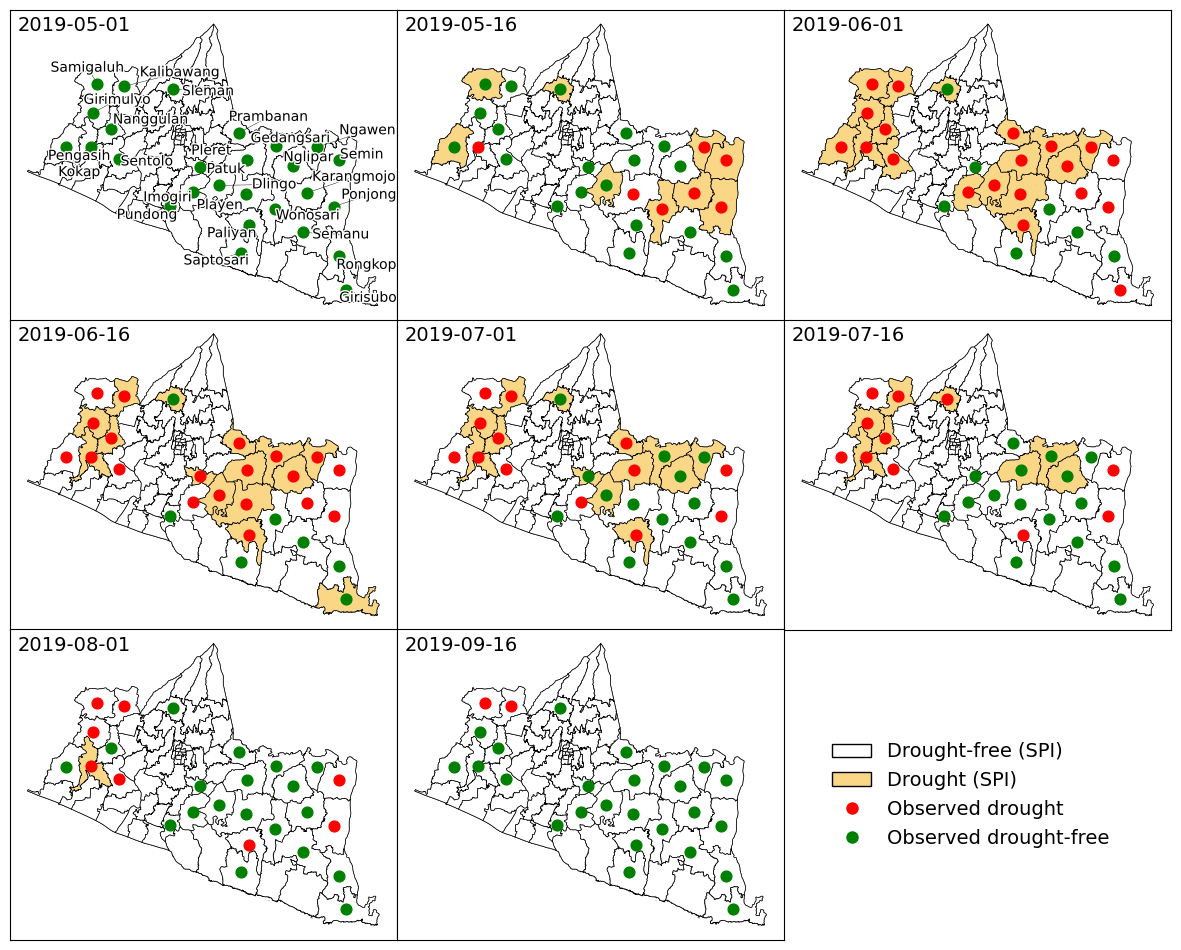

In [ ]:
# Ten-panel visualization of drought progression across fixed time slices

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from adjustText import adjust_text
import matplotlib.patheffects as path_effects

# Load core configuration
year = 2019
season = "AprSep"
optimal_scale = 10

# Load SPI-derived drought dataset
df_spi = pd.read_excel(
    f"data/dspi/identifikasi_kekeringan_SPI_rainfed_{method}_{season}.xlsx"
)

# Load observed drought reports
ds = drought_samples.copy()

# Boundaries
shp = gpd.read_file("data/shp/kecamatan_diy.shp").to_crs(3857)
shp["join_name"] = shp["NAMOBJ"].str.lower().str.strip()

df_spi["join_name"] = df_spi["kecamatan"].str.lower().str.strip()
ds["kecamatan_norm"] = ds["kecamatan"].str.lower().str.strip()

rainfed_kec = set(df_spi["join_name"].unique())

# Filter drought actual data
ds["period_start"] = pd.to_datetime(ds["period_start"])
ds["period_end"]   = pd.to_datetime(ds["period_end"])

ds = ds[
    (ds["period_start"].dt.year == year)
    & (ds["musim_tanam_norm"].str.contains("aprilseptember"))
    & (ds["kecamatan_norm"].isin(rainfed_kec))
].copy()

# Filter SPI data
df_spi["period_start"] = pd.to_datetime(df_spi["period_start"])
df_spi["onset_spi"]     = pd.to_datetime(df_spi["onset_spi"])
df_spi["end_spi"]       = pd.to_datetime(df_spi["end_spi"], errors="coerce")

df_spi = df_spi[
    (df_spi["period_start"].dt.year == year)
    & (df_spi["scale"] == optimal_scale)
]

# Time slices
selected_dates = pd.to_datetime([
    f"{year}-05-01", f"{year}-05-16",
    f"{year}-06-01", f"{year}-06-16",
    f"{year}-07-01", f"{year}-07-16",
    f"{year}-08-01", f"{year}-09-16",
])

# Prepare SPI spatial data
df_spi["drought_spi"] = df_spi["onset_spi"].notna()
shp_spi = shp.merge(
    df_spi[["join_name", "drought_spi", "onset_spi", "end_spi"]],
    on="join_name", how="left"
)

# Observed drought spatial join
ds["actual"] = True
shp_actual = shp.merge(
    ds[["kecamatan_norm", "actual", "period_start", "period_end"]],
    left_on="join_name",
    right_on="kecamatan_norm",
    how="left"
)
shp_actual["actual"] = shp_actual["actual"].fillna(False)

shp["centroid"] = shp.geometry.centroid

# Layout
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(
    3, 3,
    wspace=-0.0025,
    hspace=-0.0025,
    bottom=0.25, top=0.87
)

axes = [fig.add_subplot(gs[i // 3, i % 3]) for i in range(9)]
color_spi_drought = "#f9d787"

# Panel loop
for panel_index, (ax, t) in enumerate(zip(axes, selected_dates)):
    t = pd.to_datetime(t)

    # SPI drought state
    shp_spi["is_drought"] = (
        shp_spi["drought_spi"]
        & (shp_spi["onset_spi"] <= t)
        & ((shp_spi["end_spi"].isna()) | (shp_spi["end_spi"] >= t))
    )

    shp.plot(ax=ax, color="white", edgecolor="black", linewidth=0.5)

    shp_spi.plot(
        ax=ax,
        color=shp_spi["is_drought"].map({True: color_spi_drought, False: "white"}),
        edgecolor="black", linewidth=0.5
    )

    # Kecamatan labels (only for first panel)
    if panel_index == 0:
        texts = []
        for _, row in shp.iterrows():
            if row["join_name"] not in rainfed_kec:
                continue

            c = row["centroid"]
            kec_label = row["join_name"].title()

            txt = ax.text(
                c.x, c.y,
                kec_label,
                fontsize=10,
                ha="center", va="center",
                color="black",
                zorder=10
            )
            txt.set_path_effects([
                path_effects.Stroke(linewidth=2, foreground='white'),
                path_effects.Normal()
            ])
            texts.append(txt)

        adjust_text(
            texts, ax=ax,
            expand_points=(1.2, 1.4),
            expand_text=(1.2, 1.4),
            arrowprops=dict(arrowstyle="-", lw=0.3, color="black")
        )

    # Observed drought (points)
    shp_actual["actual_now"] = (
        (shp_actual["period_start"] <= t)
        & (shp_actual["period_end"] >= t)
    )

    for _, row in shp_actual.iterrows():
        if row["join_name"] not in rainfed_kec:
            continue
        c = row.geometry.centroid
        ax.scatter(
            c.x, c.y,
            color="red" if row["actual_now"] else "green",
            s=60, zorder=5
        )

    # Date label
    ax.text(
        0.02, 0.98, t.strftime("%Y-%m-%d"),
        transform=ax.transAxes,
        fontsize=14, va="top", ha="left"
    )

    ax.set_xticks([]); ax.set_yticks([])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(0.8)

# Turn off unused panels
for i in range(len(selected_dates), 9):
    axes[i].axis("off")

# Legends
legend_elements = [
    Patch(facecolor="white", edgecolor="black", label="Drought-free (SPI)"),
    Patch(facecolor=color_spi_drought, edgecolor="black", label="Drought (SPI)"),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
           markersize=10, label='Observed drought'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green',
           markersize=10, label='Observed drought-free')
]

fig.legend(
    handles=legend_elements,
    loc='lower right',
    bbox_to_anchor=(0.87, 0.3),
    ncol=1, fontsize=14, frameon=False
)

# fig.suptitle(
#     f"Validation of SPI{optimal_scale} Drought Identification\nDIY {season} {year}",
#     fontsize=16, y=0.92
# )
print(f"Validation of SPI{optimal_scale} Drought Identification\nDIY {season} {year}")
plt.show()


/var/folders/9g/y4lb5z2j2jg8m_dmhp5c6bjh0000gn/T/ipykernel_87230/2560876281.py:77: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shp_actual["actual"] = shp_actual["actual"].fillna(False)


Validation of SPI10 Drought Identification
DIY OctMar 2019


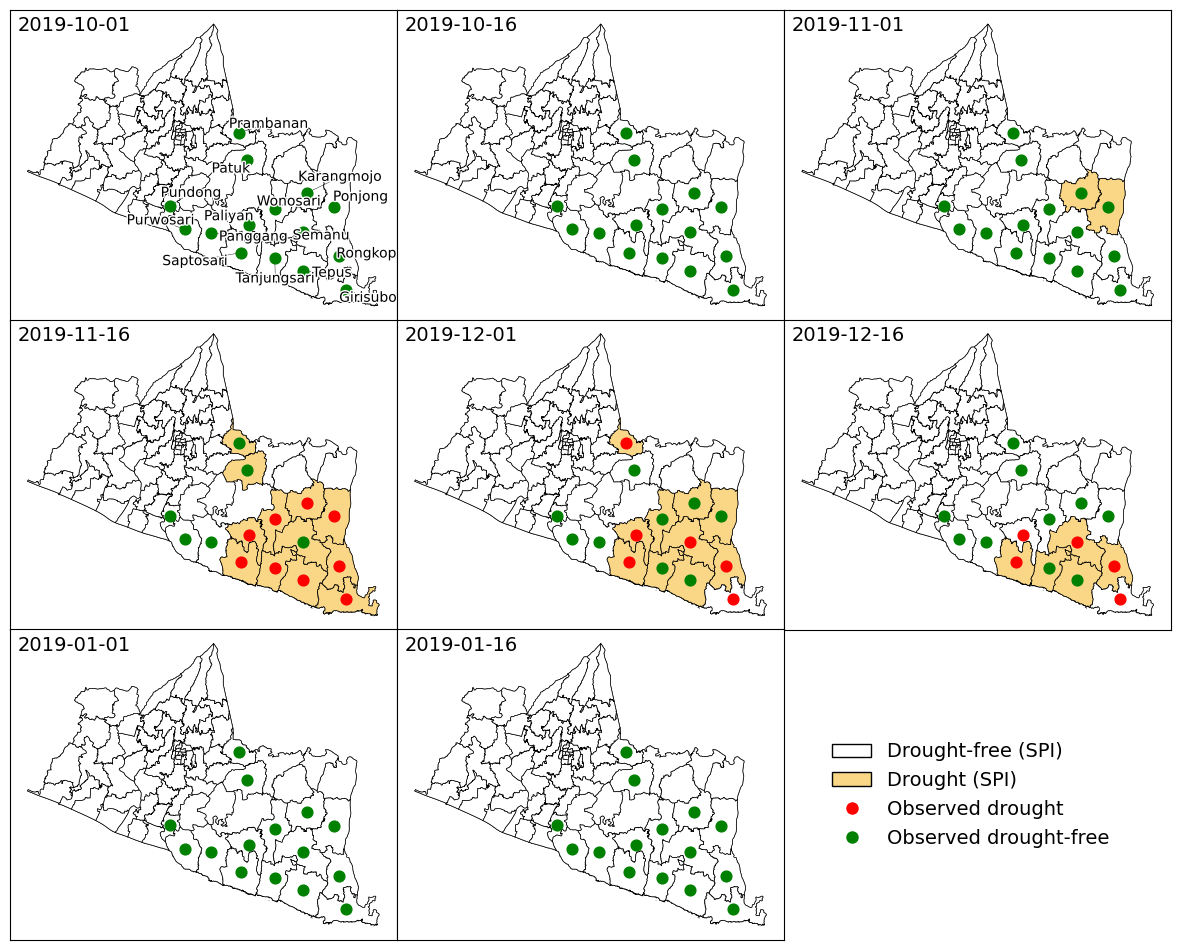

In [208]:
# Ten-panel visualization of drought progression across fixed time slices

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from adjustText import adjust_text
import matplotlib.patheffects as path_effects

# Load core configuration
year = 2019
season = "OctMar"
optimal_scale = 10

# Load SPI-derived drought dataset
df_spi = pd.read_excel(
    f"data/dspi/identifikasi_kekeringan_SPI_rainfed_{method}_{season}.xlsx"
)

# Load observed drought reports
ds = drought_samples.copy()

# Boundaries
shp = gpd.read_file("data/shp/kecamatan_diy.shp").to_crs(3857)
shp["join_name"] = shp["NAMOBJ"].str.lower().str.strip()

df_spi["join_name"] = df_spi["kecamatan"].str.lower().str.strip()
ds["kecamatan_norm"] = ds["kecamatan"].str.lower().str.strip()

rainfed_kec = set(df_spi["join_name"].unique())

# Filter drought actual data
ds["period_start"] = pd.to_datetime(ds["period_start"])
ds["period_end"]   = pd.to_datetime(ds["period_end"])

ds = ds[
    (ds["period_start"].dt.year == year)
    & (ds["musim_tanam_norm"].str.contains("oktobermaret"))
    & (ds["kecamatan_norm"].isin(rainfed_kec))
].copy()

# Filter SPI data
df_spi["period_start"] = pd.to_datetime(df_spi["period_start"])
df_spi["onset_spi"]     = pd.to_datetime(df_spi["onset_spi"])
df_spi["end_spi"]       = pd.to_datetime(df_spi["end_spi"], errors="coerce")

df_spi = df_spi[
    (df_spi["period_start"].dt.year == year)
    & (df_spi["scale"] == optimal_scale)
]

# Time slices
selected_dates = pd.to_datetime([
    f"{year}-10-01", f"{year}-10-16",
    f"{year}-11-01", f"{year}-11-16",
    f"{year}-12-01", f"{year}-12-16",
    f"{year}-01-01", f"{year}-01-16",
])

# Prepare SPI spatial data
df_spi["drought_spi"] = df_spi["onset_spi"].notna()
shp_spi = shp.merge(
    df_spi[["join_name", "drought_spi", "onset_spi", "end_spi"]],
    on="join_name", how="left"
)

# Observed drought spatial join
ds["actual"] = True
shp_actual = shp.merge(
    ds[["kecamatan_norm", "actual", "period_start", "period_end"]],
    left_on="join_name",
    right_on="kecamatan_norm",
    how="left"
)
shp_actual["actual"] = shp_actual["actual"].fillna(False)

shp["centroid"] = shp.geometry.centroid

# Layout
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(
    3, 3,
    wspace=-0.0025,
    hspace=-0.0025,
    bottom=0.25, top=0.87
)

axes = [fig.add_subplot(gs[i // 3, i % 3]) for i in range(9)]
color_spi_drought = "#f9d787"

# Panel loop
for panel_index, (ax, t) in enumerate(zip(axes, selected_dates)):
    t = pd.to_datetime(t)

    # SPI drought state
    shp_spi["is_drought"] = (
        shp_spi["drought_spi"]
        & (shp_spi["onset_spi"] <= t)
        & ((shp_spi["end_spi"].isna()) | (shp_spi["end_spi"] >= t))
    )

    shp.plot(ax=ax, color="white", edgecolor="black", linewidth=0.5)

    shp_spi.plot(
        ax=ax,
        color=shp_spi["is_drought"].map({True: color_spi_drought, False: "white"}),
        edgecolor="black", linewidth=0.5
    )

    # Kecamatan labels (only for first panel)
    if panel_index == 0:
        texts = []
        for _, row in shp.iterrows():
            if row["join_name"] not in rainfed_kec:
                continue

            c = row["centroid"]
            kec_label = row["join_name"].title()

            txt = ax.text(
                c.x, c.y,
                kec_label,
                fontsize=10,
                ha="center", va="center",
                color="black",
                zorder=10
            )
            txt.set_path_effects([
                path_effects.Stroke(linewidth=2, foreground='white'),
                path_effects.Normal()
            ])
            texts.append(txt)

        adjust_text(
            texts, ax=ax,
            expand_points=(1.2, 1.4),
            expand_text=(1.2, 1.4),
            arrowprops=dict(arrowstyle="-", lw=0.3, color="black")
        )

    # Observed drought (points)
    shp_actual["actual_now"] = (
        (shp_actual["period_start"] <= t)
        & (shp_actual["period_end"] >= t)
    )

    for _, row in shp_actual.iterrows():
        if row["join_name"] not in rainfed_kec:
            continue
        c = row.geometry.centroid
        ax.scatter(
            c.x, c.y,
            color="red" if row["actual_now"] else "green",
            s=60, zorder=5
        )

    # Date label
    ax.text(
        0.02, 0.98, t.strftime("%Y-%m-%d"),
        transform=ax.transAxes,
        fontsize=14, va="top", ha="left"
    )

    ax.set_xticks([]); ax.set_yticks([])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(0.8)

# Turn off unused panels
for i in range(len(selected_dates), 9):
    axes[i].axis("off")

# Legends
legend_elements = [
    Patch(facecolor="white", edgecolor="black", label="Drought-free (SPI)"),
    Patch(facecolor=color_spi_drought, edgecolor="black", label="Drought (SPI)"),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
           markersize=10, label='Observed drought'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green',
           markersize=10, label='Observed drought-free')
]

fig.legend(
    handles=legend_elements,
    loc='lower right',
    bbox_to_anchor=(0.87, 0.3),
    ncol=1, fontsize=14, frameon=False
)

# fig.suptitle(
#     f"Validation of SPI{optimal_scale} Drought Identification\nDIY {season} {year}",
#     fontsize=16, y=0.92
# )
print(f"Validation of SPI{optimal_scale} Drought Identification\nDIY {season} {year}")
plt.show()



Generating maps for SPI-10 (AllSeason)...


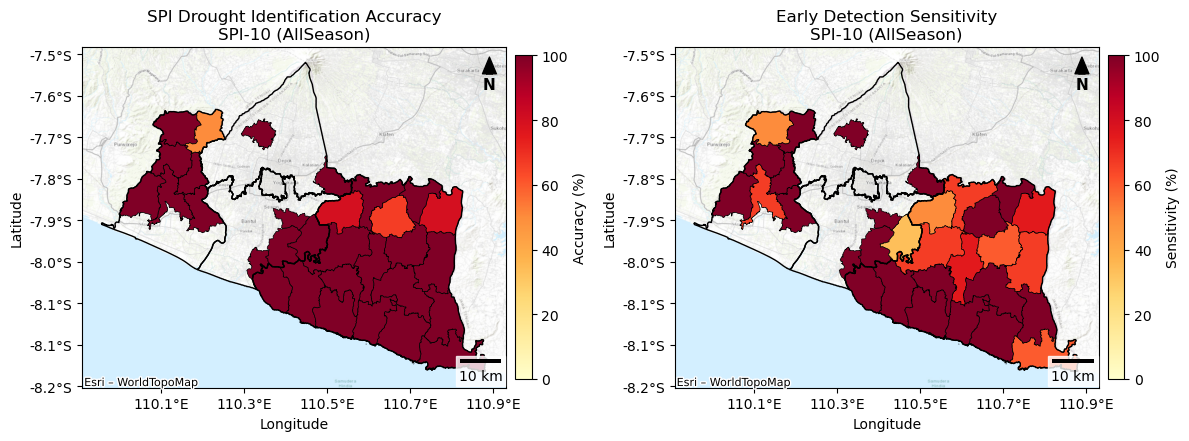

Saved two-panel SPI-10 map to:
  data/img/peta_SPI10_AllSeason_akurasi_sensitivitas_duapanel.png

Generating maps for SPI-15 (AllSeason)...


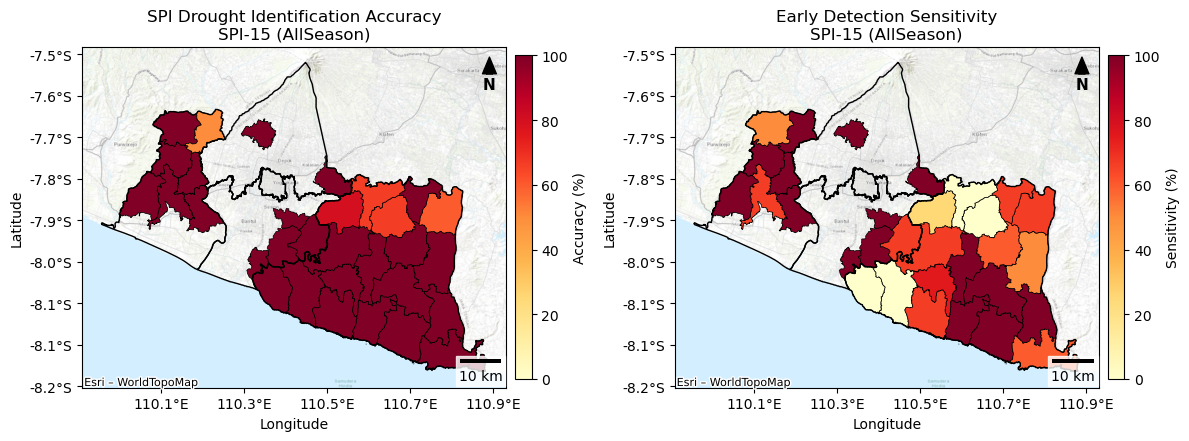

Saved two-panel SPI-15 map to:
  data/img/peta_SPI15_AllSeason_akurasi_sensitivitas_duapanel.png

Generating maps for SPI-20 (AllSeason)...


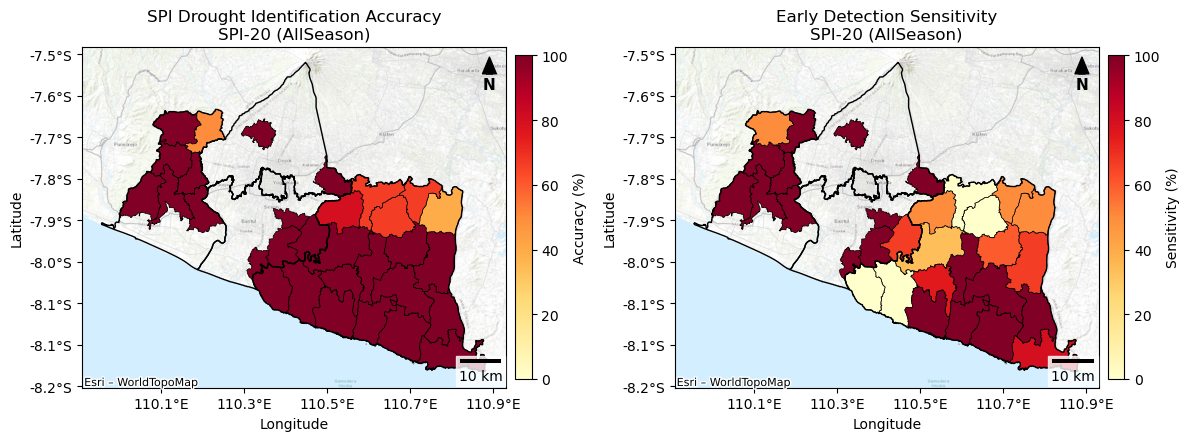

Saved two-panel SPI-20 map to:
  data/img/peta_SPI20_AllSeason_akurasi_sensitivitas_duapanel.png

Generating maps for SPI-30 (AllSeason)...


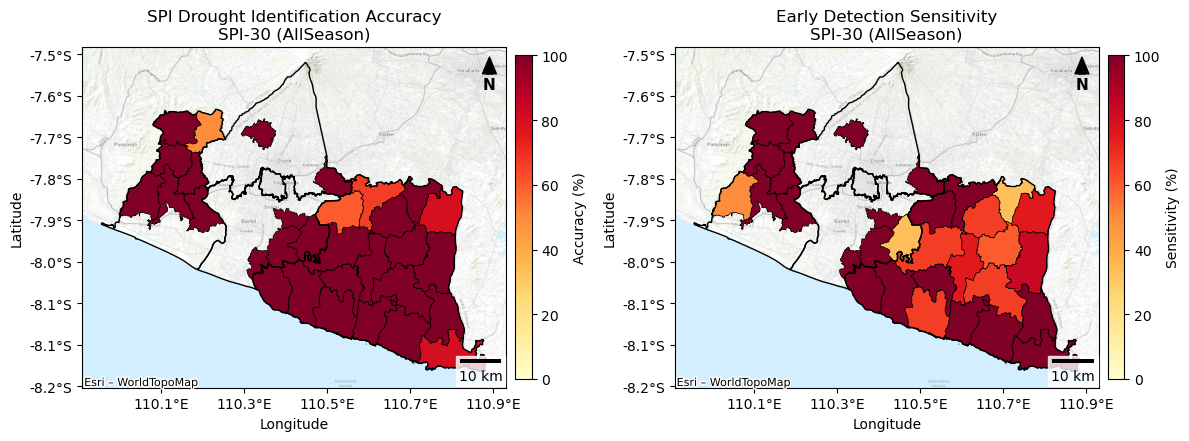

Saved two-panel SPI-30 map to:
  data/img/peta_SPI30_AllSeason_akurasi_sensitivitas_duapanel.png

Generating maps for SPI-60 (AllSeason)...


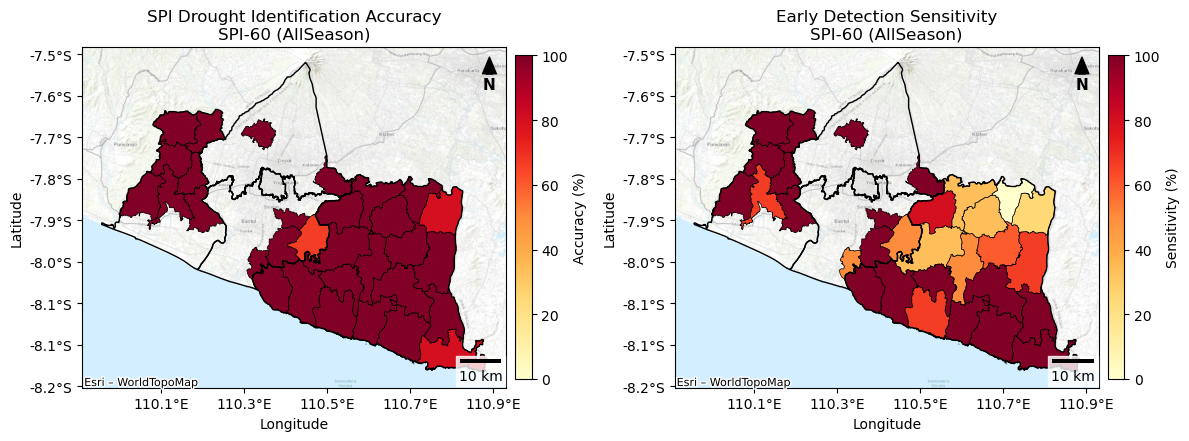

Saved two-panel SPI-60 map to:
  data/img/peta_SPI60_AllSeason_akurasi_sensitivitas_duapanel.png

Generating maps for SPI-90 (AllSeason)...


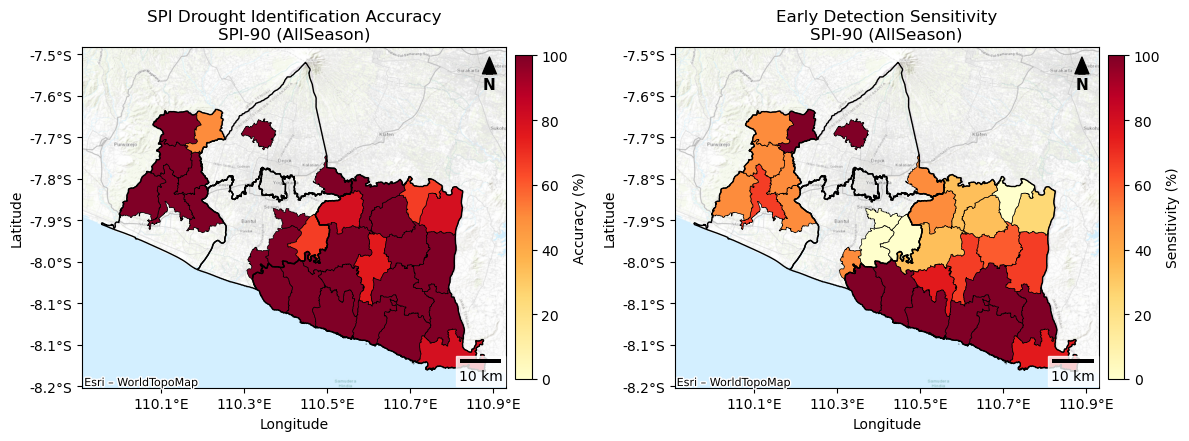

Saved two-panel SPI-90 map to:
  data/img/peta_SPI90_AllSeason_akurasi_sensitivitas_duapanel.png


In [28]:
# Spatial Visualization of Accuracy and Sensitivity for Each SPI Time Scale

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from pyproj import Transformer
import contextily as ctx

# Core parameters
season = "AllSeason"      # Options: "AprSep", "OctMar", "AllSeason"
# method = "p10"          # Provided externally
# scales = [10, 15, 20, 30, 60, 90]

# Load SPI-identified drought dataset and administrative boundaries
spi_identified_df = pd.read_excel(
    f"data/dspi/identifikasi_kekeringan_SPI_rainfed_{method}_{season}.xlsx"
)

shp_kecamatan = gpd.read_file("data/shp/kecamatan_diy.shp").to_crs(epsg=32749)
shp_kabupaten = gpd.read_file("data/shp/kabupaten_diy.shp").to_crs(epsg=32749)

# Ensure date fields are valid datetime objects
for col in ['onset_spi', 'end_spi', 'period_start', 'period_end']:
    if col in spi_identified_df.columns:
        spi_identified_df[col] = pd.to_datetime(spi_identified_df[col], errors='coerce')

# Identification flags
spi_identified_df["is_identified"] = spi_identified_df["is_drought_identified"]
spi_identified_df["is_early"] = np.where(
    spi_identified_df["is_drought_identified"]
    & (spi_identified_df["onset_spi"] < spi_identified_df["period_start"]),
    True, False
)

# Aggregate performance metrics per subdistrict and SPI time scale
acc_by_kec = (
    spi_identified_df.groupby(["kecamatan", "scale"])
    .agg(
        total=("id", "count"),
        identified=("is_identified", "sum"),
        early_identified=("is_early", "sum")
    )
    .assign(
        accuracy=lambda x: np.where(
            x["total"] > 0, (x["identified"] / x["total"] * 100).round(1), np.nan),
        sensitivity=lambda x: np.where(
            x["identified"] > 0, (x["early_identified"] / x["identified"] * 100).round(1), np.nan)
    )
    .reset_index()
)

# Harmonize names for spatial join
shp_kecamatan["join_name"] = shp_kecamatan["NAMOBJ"].str.lower().str.strip()
acc_by_kec["join_name"] = acc_by_kec["kecamatan"].astype(str).str.lower().str.strip()

# Iterate over SPI time scales and generate two-panel maps
for scale_target in scales:
    print(f"\nGenerating maps for SPI-{scale_target} ({season})...")

    df_sel = acc_by_kec[acc_by_kec["scale"] == scale_target].copy()
    gdf = shp_kecamatan.merge(df_sel, on="join_name", how="left")

    # Ensure numeric fields
    for col in ["accuracy", "sensitivity"]:
        gdf[col] = pd.to_numeric(gdf[col], errors="coerce")

    # Reproject to Web Mercator for basemap compatibility
    gdf_3857 = gdf.to_crs(epsg=3857)
    kab_3857 = shp_kabupaten.to_crs(epsg=3857)

    # Coordinate formatter for longitude and latitude labels
    transformer = Transformer.from_crs("epsg:3857", "epsg:4326", always_xy=True)

    def format_lon(x, pos):
        lon, _ = transformer.transform(
            x, (gdf_3857.total_bounds[1] + gdf_3857.total_bounds[3]) / 2
        )
        return f"{lon:.1f}°E"

    def format_lat(y, pos):
        _, lat = transformer.transform(
            (gdf_3857.total_bounds[0] + gdf_3857.total_bounds[2]) / 2, y
        )
        return f"{lat:.1f}°S"

    def add_scalebar_and_north(ax):
        scalebar = ScaleBar(1, units="m", length_fraction=0.12,
                            location="lower right", box_alpha=0.8)
        ax.add_artist(scalebar)
        x, y, arrow_length = 0.96, 0.97, 0.08
        ax.annotate(
            "N", xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor="black", width=4, headwidth=10),
            ha="center", va="center", fontsize=11,
            xycoords=ax.transAxes, fontweight="bold"
        )

    # Create a two-panel figure for accuracy and sensitivity
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    cmap_obj = plt.colormaps["YlOrRd"]
    vmin, vmax = 0, 100

    for ax, (col, title, label) in zip(
        axes,
        [
            ("accuracy", "SPI Drought Identification Accuracy", "Accuracy (%)"),
            ("sensitivity", "Early Detection Sensitivity", "Sensitivity (%)")
        ]
    ):
        gdf_3857.plot(
            column=col, cmap=cmap_obj, linewidth=0.5, edgecolor="black",
            ax=ax, vmin=vmin, vmax=vmax, zorder=3
        )
        kab_3857.boundary.plot(ax=ax, color="black", linewidth=1.0, zorder=4)

        try:
            ctx.add_basemap(
                ax, source=ctx.providers.Esri.WorldTopoMap,
                zoom=11, alpha=0.85, attribution="Esri – WorldTopoMap"
            )
        except Exception as e:
            print("Basemap loading error:", e)

        ax.set_title(f"{title}\nSPI-{scale_target} ({season})", fontsize=12)
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_lon))
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_lat))
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")

        add_scalebar_and_north(ax)

        sm = plt.cm.ScalarMappable(
            cmap=cmap_obj, norm=mcolors.Normalize(vmin=vmin, vmax=vmax)
        )
        sm._A = []
        cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.02)
        cbar.set_label(label)

    plt.tight_layout()
    out_fname = f"data/img/peta_SPI{scale_target}_{season}_akurasi_sensitivitas_duapanel.png"
    plt.savefig(out_fname, dpi=600, bbox_inches="tight", transparent=True)
    plt.show()

    print(f"Saved two-panel SPI-{scale_target} map to:")
    print(f"  {out_fname}")
